In [2]:
'''
Import necessary packages
'''
import numpy as np
import scipy
import scipy.integrate
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import pickle
from tqdm import tqdm

# from ip3_ca_ode import *
from ip3_ca_ode_cfg import *
import cfg

save = 'figures/ip3_ca_experiments/'

#set figure font sizes for readability
font = {'size' : 30,
       'family': 'serif',
       'sans-serif': ['Helvetica']}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# IP3 Controlled Experiments

## Step Input

Here, we are showing essentially the plot from Greg's paper, showing how stepping IP3 puts the system through different points of the following bifurcation, and that we can produce oscillations for a range of IP3 of about 0.175-0.35 microM

<img src="figures/ip3_ca_Hopf.png" width=300 />

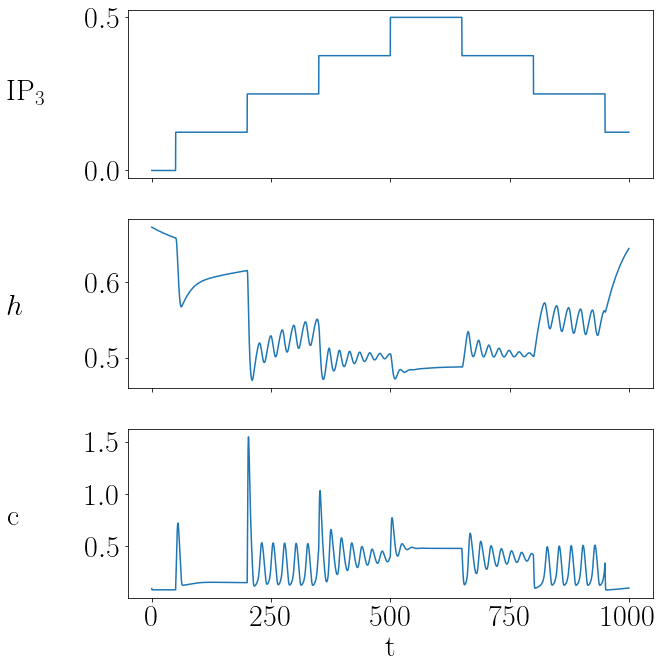

In [29]:
step_max_value = 0.5
sol = run_ip3_controlled_experiment('step')

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, p)
ax[1].plot(t, h)
ax[2].plot(t, c)

#set xlabel
ax[2].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

### Long bath at 0.375microM IP3

In the step, it looks like the step values around 0.375microM IP3 has a decaying oscillation, so I was just curious to see what this looks like

C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:320: RuntimeWarning: invalid value encountered in double_scalars


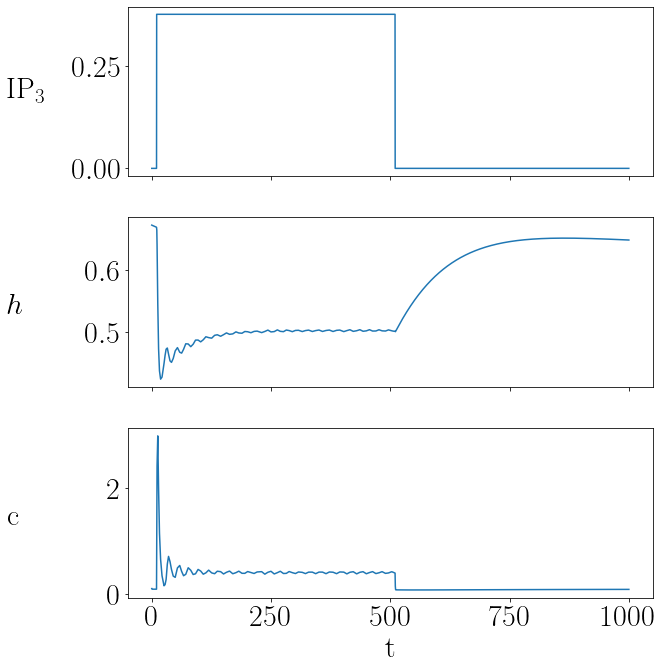

In [11]:
glut_max = 0.375
glut_duration = 500

sol = run_ip3_controlled_experiment('pulse', max_step=10)

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, p)
ax[1].plot(t, h)
ax[2].plot(t, c)

#set xlabel
ax[2].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

glut_max = 0.3
glut_duration = 50

# G* -> IP3 steps

Here we are running experiments to tune how strongly IP3 (and hence calcium) response to values of G*

It is clear that the system seems able to produce the oscillations desired, but note the relatively low level of G* required to get to this point.

Since the influence of G* on the production of IP3 is determined by a single $v_\beta$ parameter, it is easy to scale this parameter down (which is reasonable given the values of G/G* are nondimensional units). We can also tweak this in conjunction with the glutamate sensitivity of the GPCR receptor part of the model to reach desirable levels of IP3 activation

**Note that here the Ca2+ -> IP3 feedback parameter $v_{3k}$ is tuned down to 0.1 from 2**

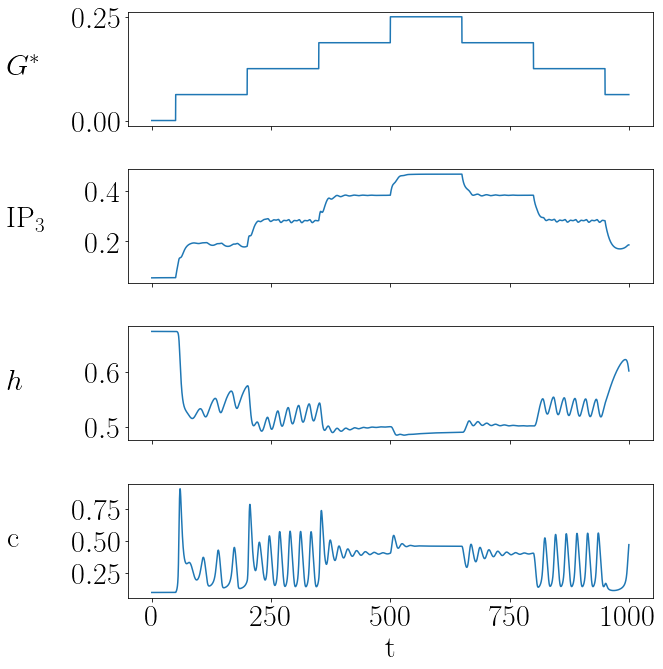

In [3]:
cfg.step_max_value = 0.25
cfg.v_3k = 0.1

sol = run_Gstar_controlled_experiment('step', t_f=1000)

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))


#plot figures
ax[0].plot(cfg.t_input, cfg.Gstar)
ax[1].plot(cfg.t, cfg.p)
ax[2].plot(cfg.t, cfg.h)
ax[3].plot(cfg.t, cfg.c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
# ax[0].set_title(r'$v_{3k} = 0.1$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()
fig.savefig(save + '2_Gstar_steps.png')

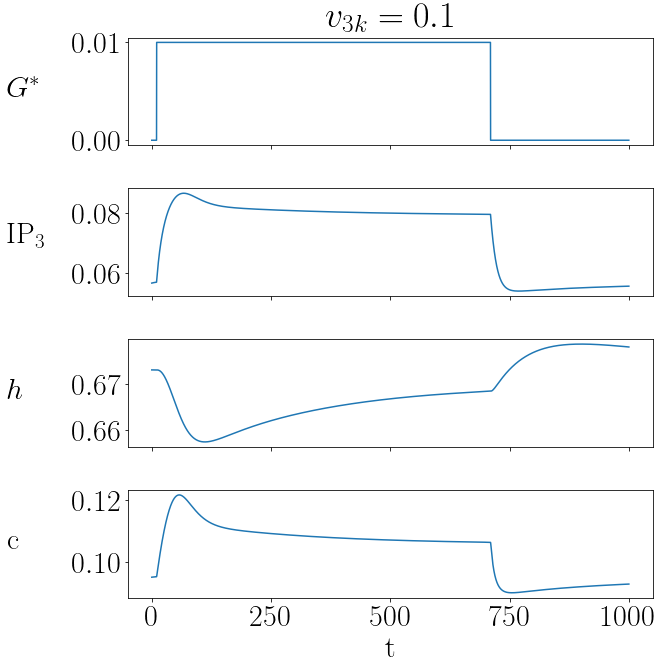

In [7]:
input_max = 0.01
input_duration = 700

sol = run_Gstar_controlled_experiment('pulse')

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, Gstar)
ax[1].plot(t, p)
ax[2].plot(t, h)
ax[3].plot(t, c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_title(r'$v_{3k} = 0.1$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

## Start of oscillation

The following two plots show near the first Hopf bifurcation around G* = 0.03 when oscillations start to occur

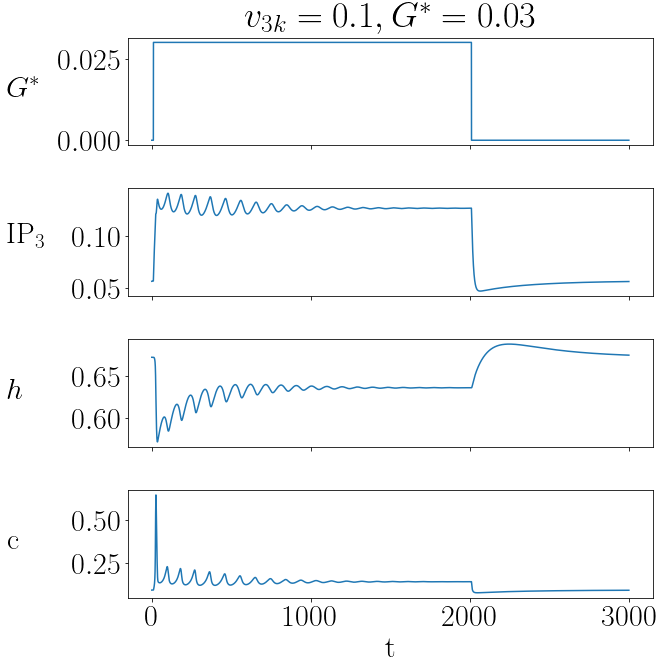

In [8]:
input_max = 0.03
input_duration = 2000
t_f = 3000

sol = run_Gstar_controlled_experiment('pulse', t_f)

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, Gstar)
ax[1].plot(t, p)
ax[2].plot(t, h)
ax[3].plot(t, c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_title(r'$v_{3k} = 0.1, G^* = 0.03$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()
fig.savefig(save + '2.1_pre_oscillation_bath.png')

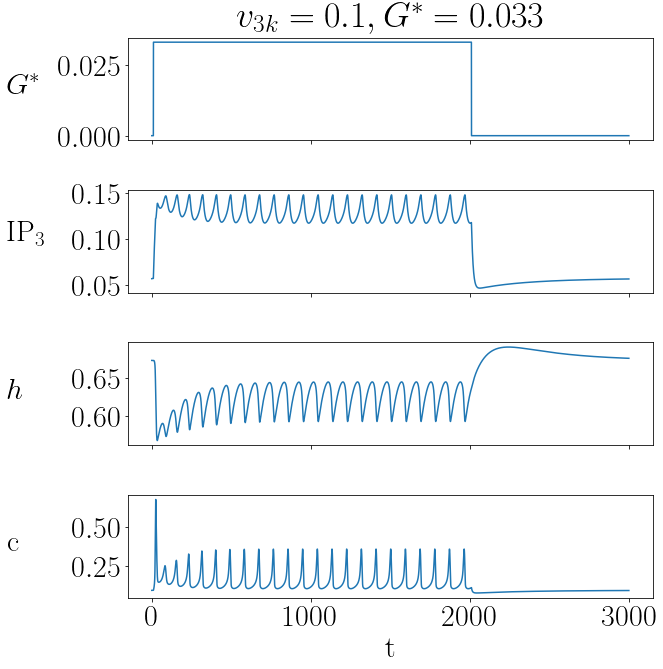

In [9]:
input_max = 0.033
input_duration = 2000
t_f = 3000

sol = run_Gstar_controlled_experiment('pulse', t_f)

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, Gstar)
ax[1].plot(t, p)
ax[2].plot(t, h)
ax[3].plot(t, c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_title(r'$v_{3k} = 0.1, G^*=0.033$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()
fig.savefig(save + '2.1_post_oscillation_bath.png')

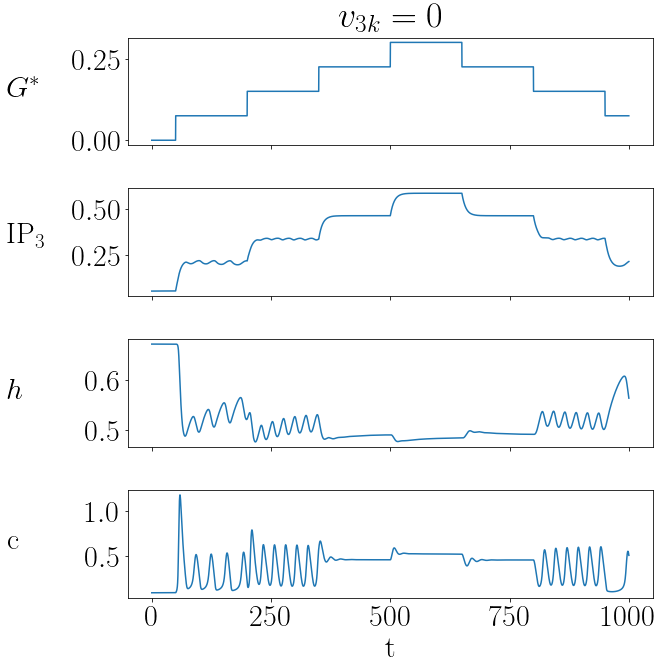

In [40]:
step_max_value = 0.3
v_3k = 0

sol = run_Gstar_controlled_experiment('step')

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, Gstar)
ax[1].plot(t, p)
ax[2].plot(t, h)
ax[3].plot(t, c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_title(r'$v_{3k} = 0$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

v_3k = 0.1

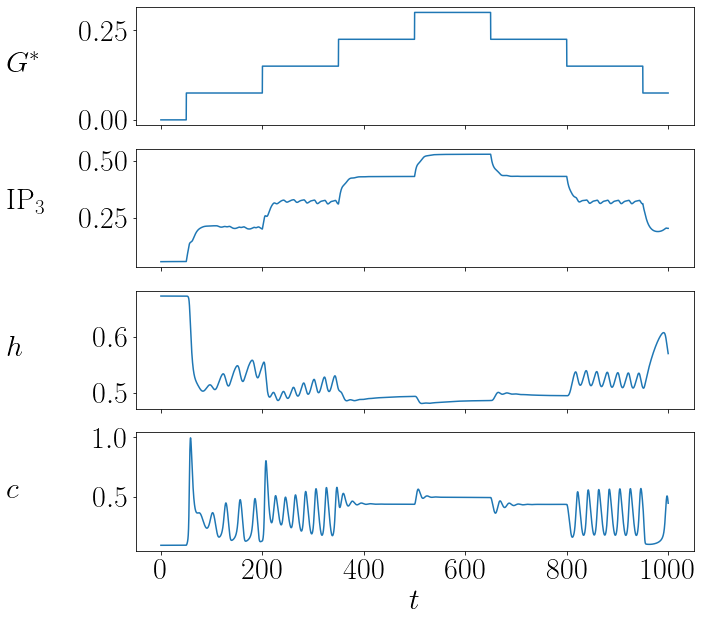

In [3]:
cfg.step_max_value = 0.3
cfg.v_3k = 0.1
cfg.input_duration = 1000
cfg.t_f = 1000
sol = run_Gstar_controlled_experiment('step')

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

plot_experiment_plots(['Gstar', 'p', 'h', 'c'], ax)



## Higher Ca -> IP3 negative feedback

Based on what we've looked at for a single pulse with v_3k=2.0, these oscillations seems to be coming primarily from the c^4 Hill function part of IP3 degradation, rather than the Hopf bifurcation driven by IP3-c-h system.

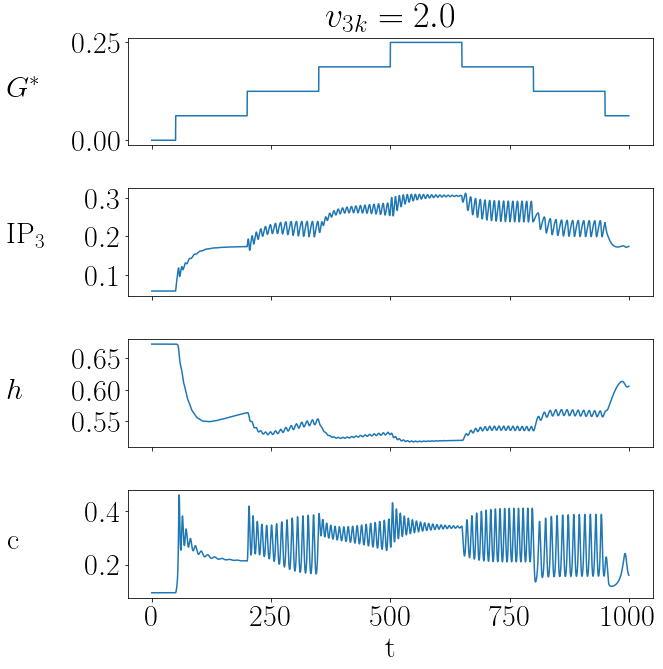

In [5]:
cfg.step_max_value = 0.25
cfg.v_3k = 2

sol = run_Gstar_controlled_experiment('step')

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(cfg.t_input, cfg.Gstar)
ax[1].plot(cfg.t, cfg.p)
ax[2].plot(cfg.t, cfg.h)
ax[3].plot(cfg.t, cfg.c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_title(r'$v_{3k} = 2.0$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()
fig.savefig(save + '2.2_v3k_2_Gstar_steps.png', bbox_inches='tight')

cfg.v_3k = 0.1

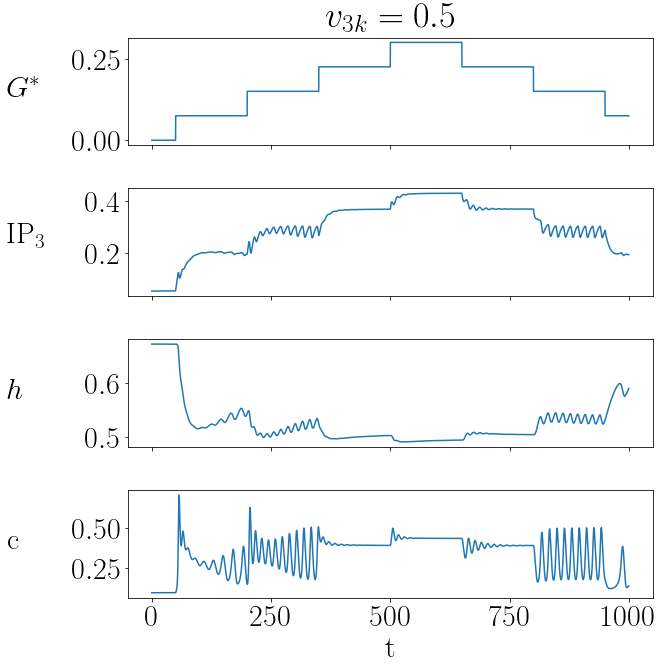

In [36]:
step_max_value = 0.3
v_3k = 0.5

sol = run_Gstar_controlled_experiment('step')

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, Gstar)
ax[1].plot(t, p)
ax[2].plot(t, h)
ax[3].plot(t, c)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_title(r'$v_{3k} = 0.5$')
ax[0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

v_3k = 0.1

# Building glutamate -> IP3 curve

Goal here is to build nice double exponential glutamate curves so we get realistsic IP3 curves for calcium output

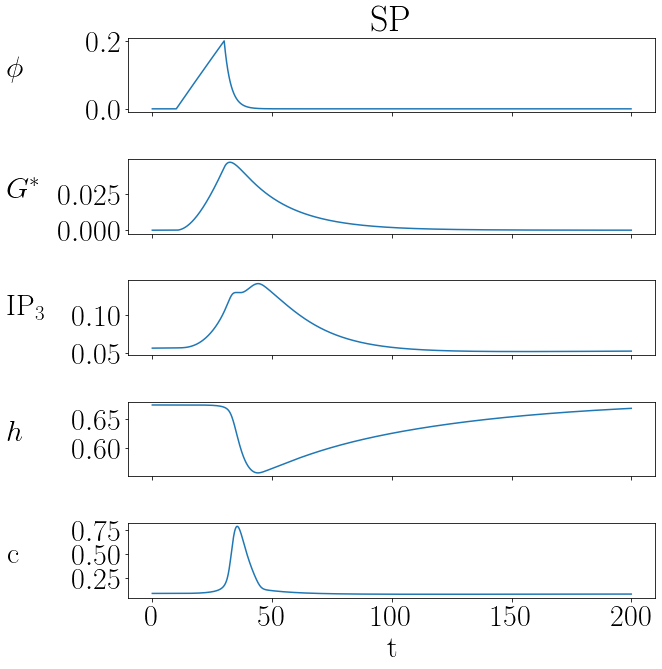

In [54]:
t_f = 200
# set_ip3_curve('MP', t=10)

#SP
A = 0.2
d_rise = 20
r_rise = 0.002
d_decay = 10
r_decay = compute_r_decay(A, d_decay)

#PL
# A = 0.2
# d_rise = 20
# r_rise = 0.002
# d_decay = 80
# r_decay = compute_r_decay(A, d_decay)

#MP
# A = 0.1
# d_rise = 40
# r_rise = 0.2
# d_decay = 100
# r_decay = compute_r_decay(A, d_decay)


sol = run_experiment('curve', t_f=t_f)

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

ax[0].set_title('SP')
#plot figures
ax[0].plot(t_input, glut)
ax[1].plot(t, Gstar)
ax[2].plot(t, p)
ax[3].plot(t, h)
ax[4].plot(t, c)

#set xlabel
ax[4].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[4].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)
ax[4].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

t_f = 1000

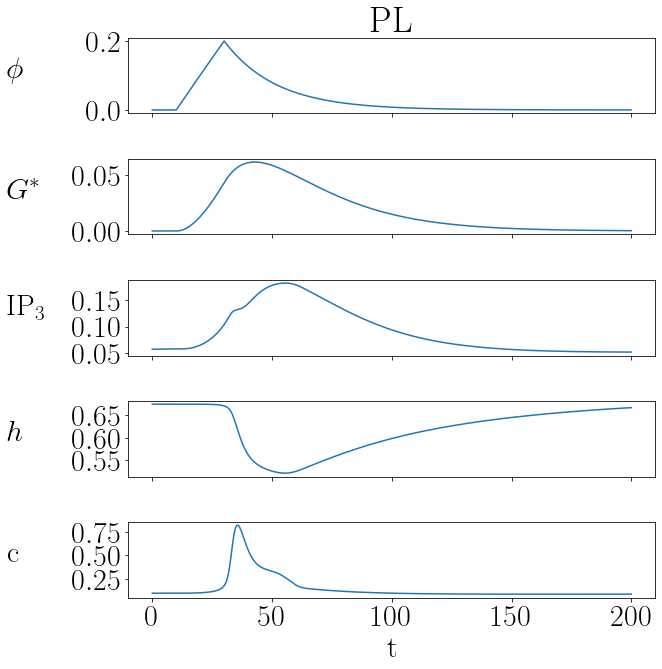

In [55]:
t_f = 200
# set_ip3_curve('MP', t=10)

#SP
# A = 0.2
# d_rise = 20
# r_rise = 0.002
# d_decay = 10
# r_decay = compute_r_decay(A, d_decay)

#PL
A = 0.2
d_rise = 20
r_rise = 0.002
d_decay = 80
r_decay = compute_r_decay(A, d_decay)

#MP
# A = 0.1
# d_rise = 40
# r_rise = 0.2
# d_decay = 100
# r_decay = compute_r_decay(A, d_decay)


sol = run_experiment('curve', t_f=t_f)

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

ax[0].set_title('PL')
#plot figures
ax[0].plot(t_input, glut)
ax[1].plot(t, Gstar)
ax[2].plot(t, p)
ax[3].plot(t, h)
ax[4].plot(t, c)

#set xlabel
ax[4].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[4].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)
ax[4].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

t_f = 1000

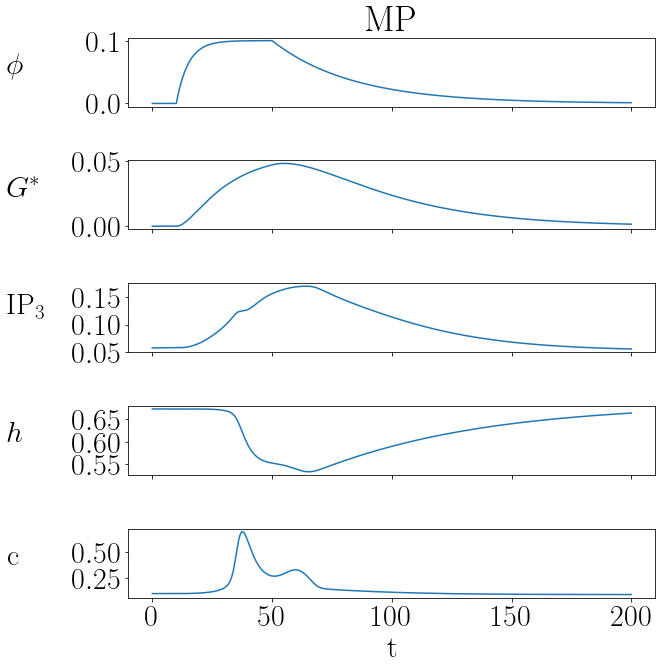

In [64]:
t_f = 200
# set_ip3_curve('MP', t=10)

#SP
# A = 0.2
# d_rise = 20
# r_rise = 0.002
# d_decay = 10
# r_decay = compute_r_decay(A, d_decay)

#PL
# A = 0.2
# d_rise = 20
# r_rise = 0.002
# d_decay = 80
# r_decay = compute_r_decay(A, d_decay)

#MP
A = 0.1
d_rise = 40
r_rise = 0.2
d_decay = 100
r_decay = compute_r_decay(A, d_decay)


sol = run_experiment('curve', t_f=t_f)

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

ax[0].set_title('MP')
#plot figures
ax[0].plot(t_input, glut)
ax[1].plot(t, Gstar)
ax[2].plot(t, p)
ax[3].plot(t, h)
ax[4].plot(t, c)

#set xlabel
ax[4].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[4].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)
ax[4].get_yaxis().set_label_coords(-0.23,0.4)

fig.tight_layout()

t_f = 1000

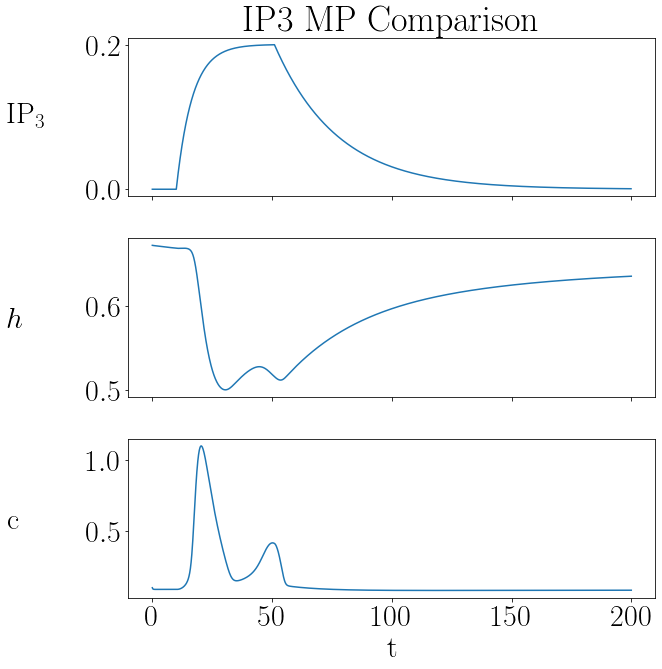

In [3]:
t_f = 200
set_ip3_curve('MP', t=10)
sol = run_ip3_controlled_experiment('curve', t_f=t_f)

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

#plot figures
ax[0].plot(t_input, p)
ax[1].plot(t, h)
ax[2].plot(t, c)

#set xlabel
ax[2].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$h$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'c', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)

ax[0].set_title('IP3 MP Comparison')

fig.tight_layout()
t_f = 1000

# Oscillation Shape

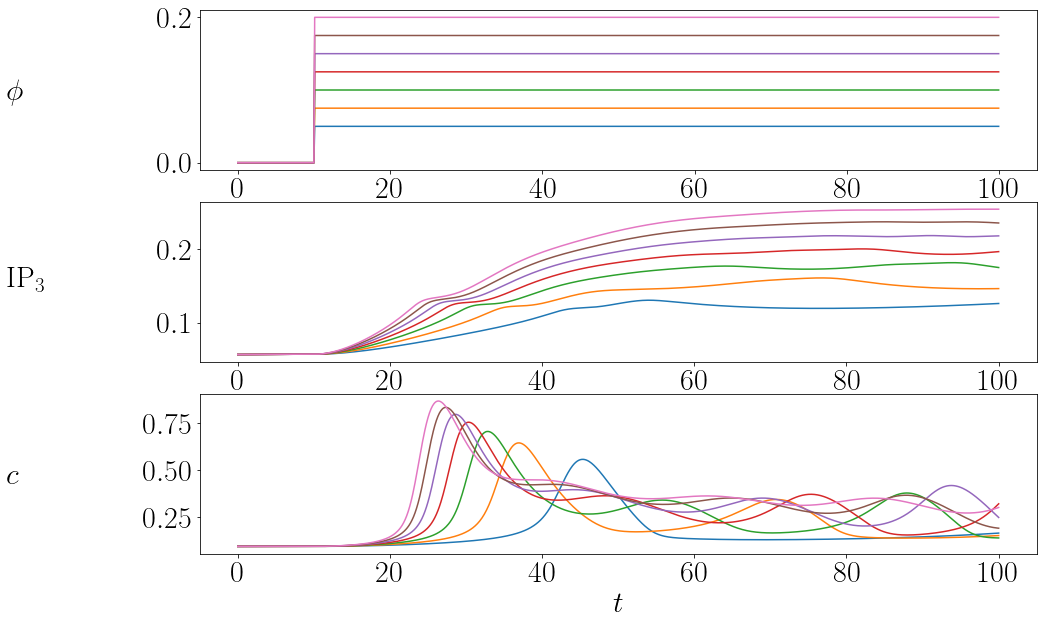

In [17]:
cfg.t_f = 100
cfg.input_duration = 100

# Gstars = [0.05, 0.1, 0.15]
Gstars = np.arange(0.05, 0.2, 0.025)

fig, ax = plt.subplots(3, 1, figsize=(15,10))

for i, input_max in enumerate(Gstars):
    cfg.input_max = input_max
    
    run_experiment('pulse', t_f=cfg.t_f)
    add_labels = False
    if(i == 0):
        add_labels = True
    plot_experiment_plots(['glut', 'p', 'c'], axs=ax[:], add_xlabel=add_labels, add_ylabels=add_labels)
    
#     ax[0, i].set_title('$G^* = ' + str(input_max) + '$')
    
# plt.tight_layout()
plt.savefig('figures/5.6_comparison.png', bbox_inches='tight')


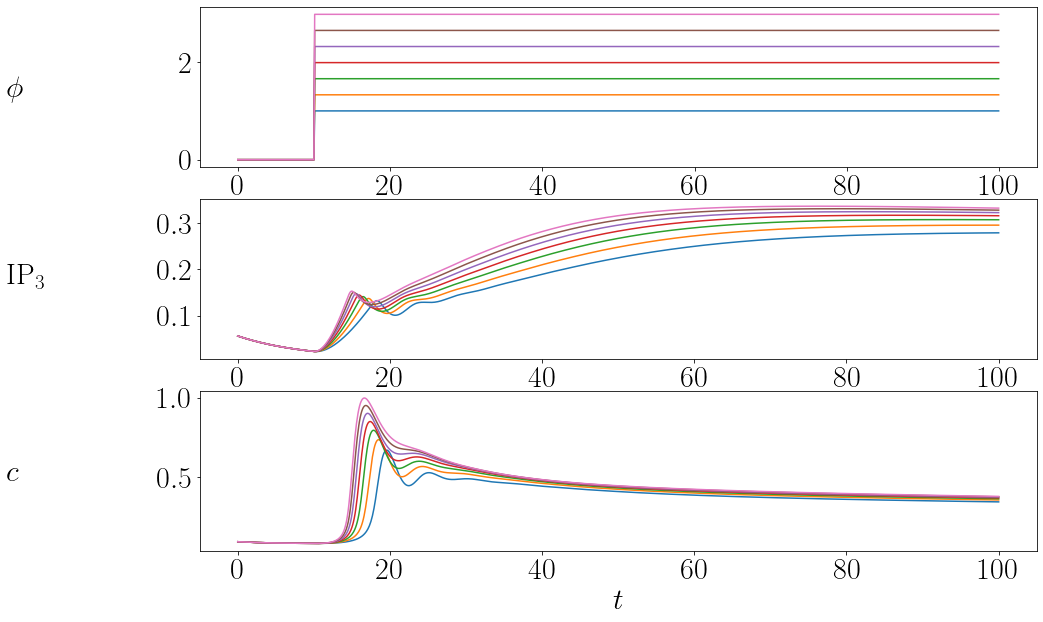

In [20]:
cfg.t_f = 100
cfg.input_duration = 100
cfg.k_plcdelta = 0.5
cfg.v_delta = 0.025
cfg.v_3k = 0.86
cfg.k_d = 0.5

# Gstars = [0.05, 0.1, 0.15]
Gstars = np.arange(1, 3, 0.33)

fig, ax = plt.subplots(3, 1, figsize=(15,10))

for i, input_max in enumerate(Gstars):
    cfg.input_max = input_max
    
    run_experiment('pulse', t_f=cfg.t_f)
    add_labels = False
    if(i == 0):
        add_labels = True
    plot_experiment_plots(['glut', 'p', 'c'], axs=ax[:], add_xlabel=add_labels, add_ylabels=add_labels)
    
#     ax[0, i].set_title('$G^* = ' + str(input_max) + '$')
    
# plt.tight_layout()
plt.savefig('figures/5.6_comparison2.png', bbox_inches='tight')


# New lambda

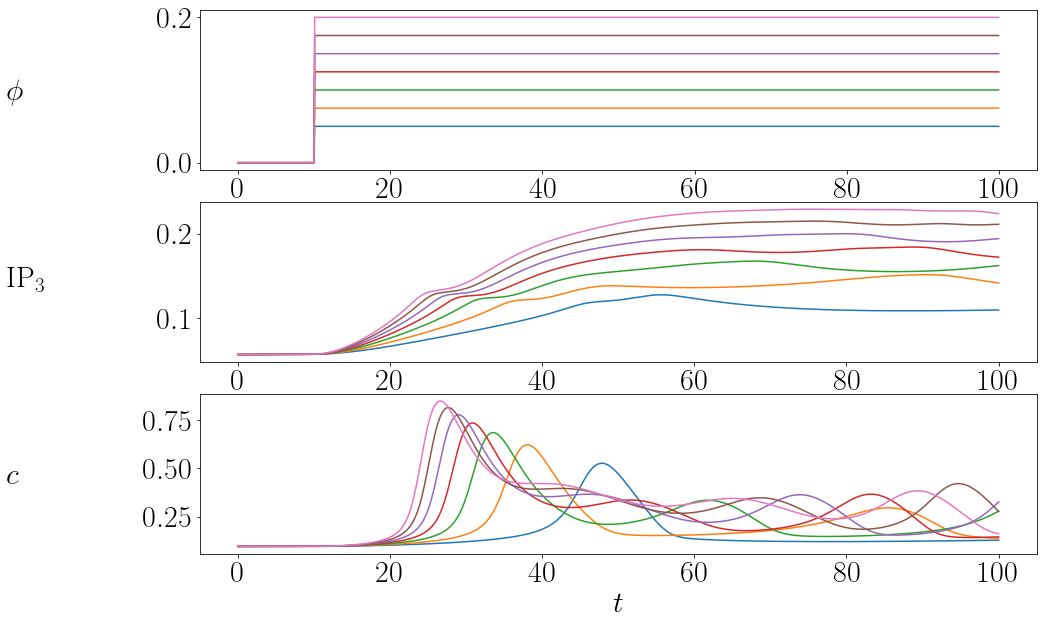

In [2]:
cfg.t_f = 100
cfg.input_duration = 100

# Gstars = [0.05, 0.1, 0.15]
Gstars = np.arange(0.05, 0.2, 0.025)

fig, ax = plt.subplots(3, 1, figsize=(15,10))

for i, input_max in enumerate(Gstars):
    cfg.input_max = input_max
    
    run_experiment('pulse', t_f=cfg.t_f)
    add_labels = False
    if(i == 0):
        add_labels = True
    plot_experiment_plots(['glut', 'p', 'c'], axs=ax[:], add_xlabel=add_labels, add_ylabels=add_labels)
    
#     ax[0, i].set_title('$G^* = ' + str(input_max) + '$')
    
# plt.tight_layout()
# plt.savefig('figures/5.6_comparison.png', bbox_inches='tight')


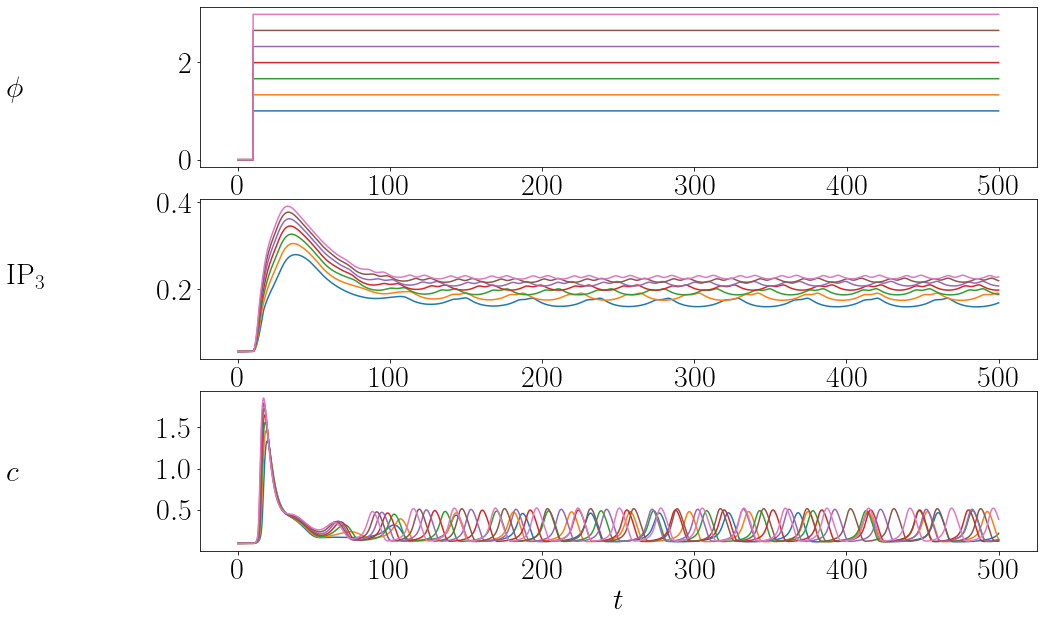

In [9]:
cfg.t_f = 500
cfg.input_duration = 500
# cfg.k_plcdelta = 0.1
# cfg.v_delta = 0.01
# cfg.v_3k = 0.1
# cfg.k_d = 0.7

# Gstars = [0.05, 0.1, 0.15]
Gstars = np.arange(1, 3, 0.33)

fig, ax = plt.subplots(3, 1, figsize=(15,10))

for i, input_max in enumerate(Gstars):
    cfg.input_max = input_max
    
    run_experiment('pulse', t_f=cfg.t_f, old_gpcr=True)
    add_labels = False
    if(i == 0):
        add_labels = True
    plot_experiment_plots(['glut', 'p', 'c'], axs=ax[:], add_xlabel=add_labels, add_ylabels=add_labels)
    
#     ax[0, i].set_title('$G^* = ' + str(input_max) + '$')
    
# plt.tight_layout()
plt.savefig('figures/5.6_comparison2.png', bbox_inches='tight')


# Experiments with the two sets of parameters

## Long bath

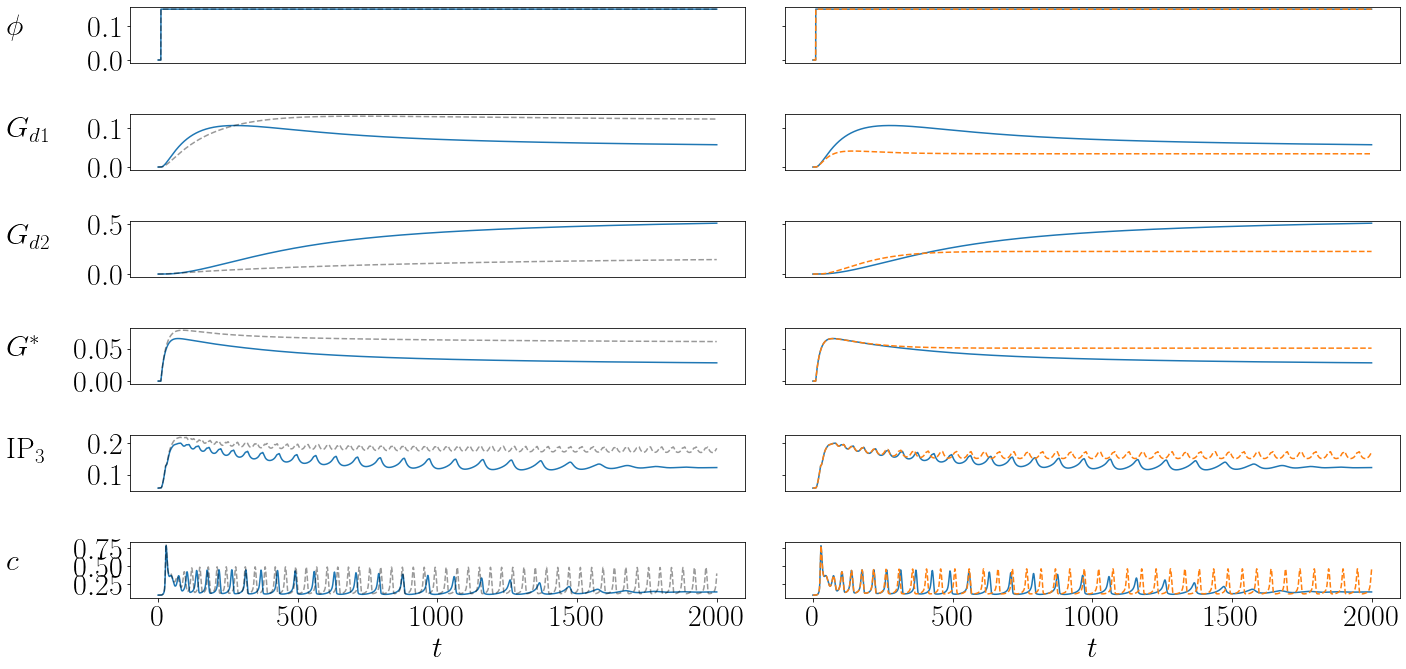

In [11]:
cfg.t_f = 2000
cfg.input_duration = 2000


fig, ax = plt.subplots(6, 2, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 0], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 1], add_xlabel=True, add_ylabels=False, legend_label='New',
                     remove_xticks=True)


run_experiment('pulse', t_f=cfg.t_f, old_gpcr=True)
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 0], add_xlabel=True, add_ylabels=False, 
                      legend_label='Old', linestyle='dashed', color='k', alpha=0.4)

set_gpcr_params(2)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 1], add_xlabel=True, add_ylabels=False, legend_label='New',
                     remove_xticks=True, linestyle='dashed')

fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_pulse_comparison2.png', bbox_inches='tight')


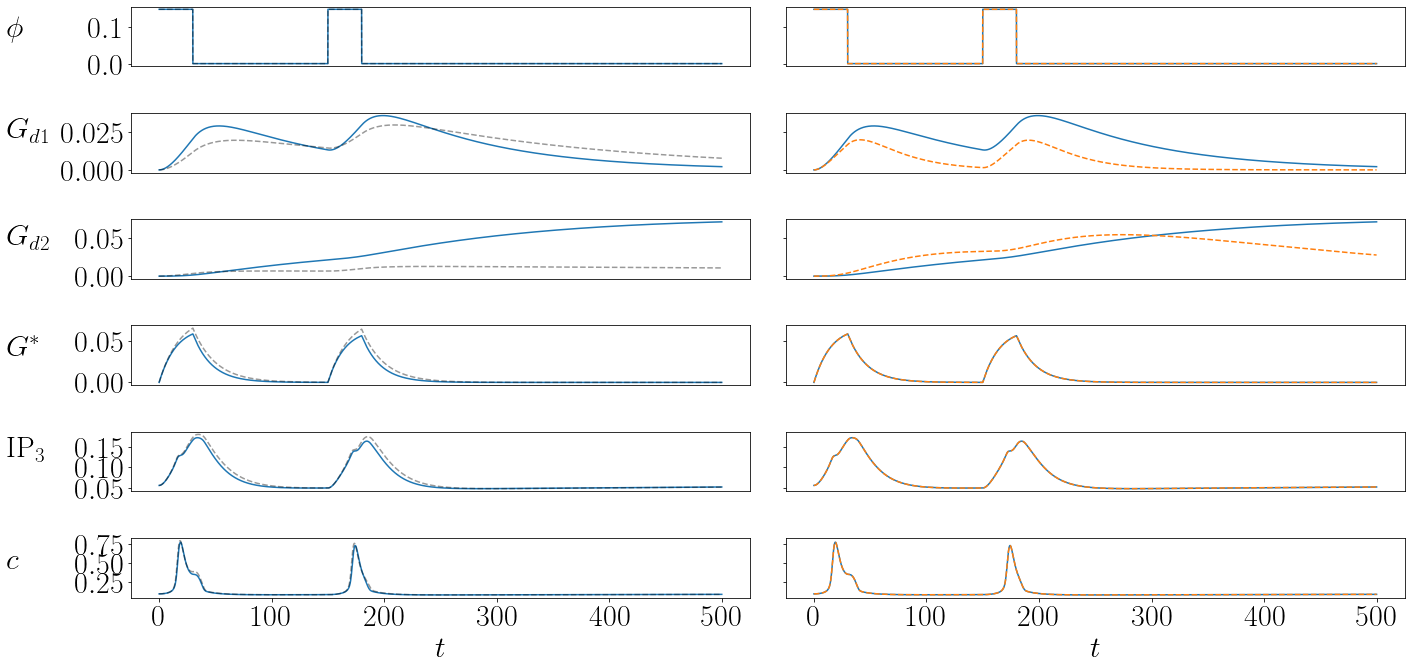

In [9]:
cfg.oscillation_on_duration = 30
cfg.oscillation_off_duration = 120
cfg.num_oscillations = 2


fig, ax = plt.subplots(6, 2, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('oscillation', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 0], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 1], add_xlabel=True, add_ylabels=False, legend_label='New',
                     remove_xticks=True)


run_experiment('oscillation', t_f=cfg.t_f, old_gpcr=True)
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 0], add_xlabel=True, add_ylabels=False, 
                      legend_label='Old', linestyle='dashed', color='k', alpha=0.4)

set_gpcr_params(2)
run_experiment('oscillation', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gd1', 'Gd2', 'Gstar', 'p', 'c'], axs=ax[:, 1], add_xlabel=True, add_ylabels=False, legend_label='New',
                     remove_xticks=True, linestyle='dashed')

fig.tight_layout()
# ax[0].legend()
plt.savefig('figures/full_double_bath_comparison2.png', bbox_inches='tight')


## Spritz

KeyboardInterrupt: 

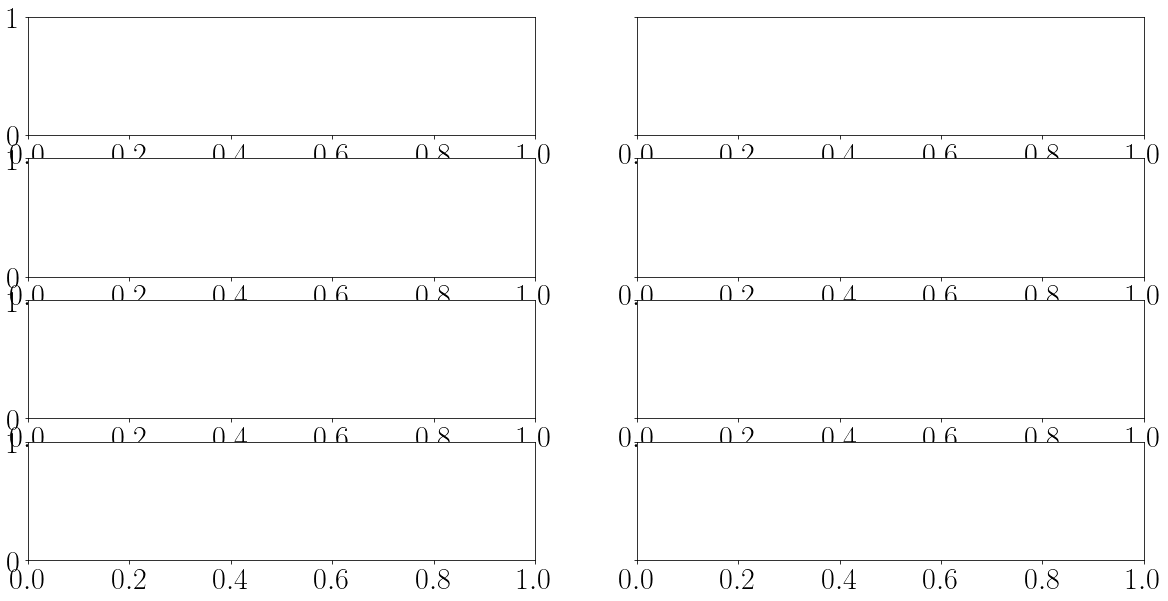

In [12]:
cfg.t_f = 250
cfg.input_duration = 250


fig, ax = plt.subplots(4, 2, figsize=(20, 10), sharey='row')

cfg.input_max = 50
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 30
cfg.num_oscillations = 10

set_gpcr_params(1)
run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:, 0], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:, 1], add_xlabel=True, add_ylabels=False, legend_label='New',
                     remove_xticks=True, remove_yticks=True)


run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005, old_gpcr=True)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:, 0], add_xlabel=True, add_ylabels=False, 
                      legend_label='Old', linestyle='dashed', color='k', alpha=0.4)

set_gpcr_params(2)
run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:, 1], add_xlabel=True, add_ylabels=False, legend_label='New',
                     remove_xticks=True, linestyle='dashed')

fig.tight_layout()
# ax[0].legend()
plt.savefig('figures/full_spritz_comparison_30.png', bbox_inches='tight')


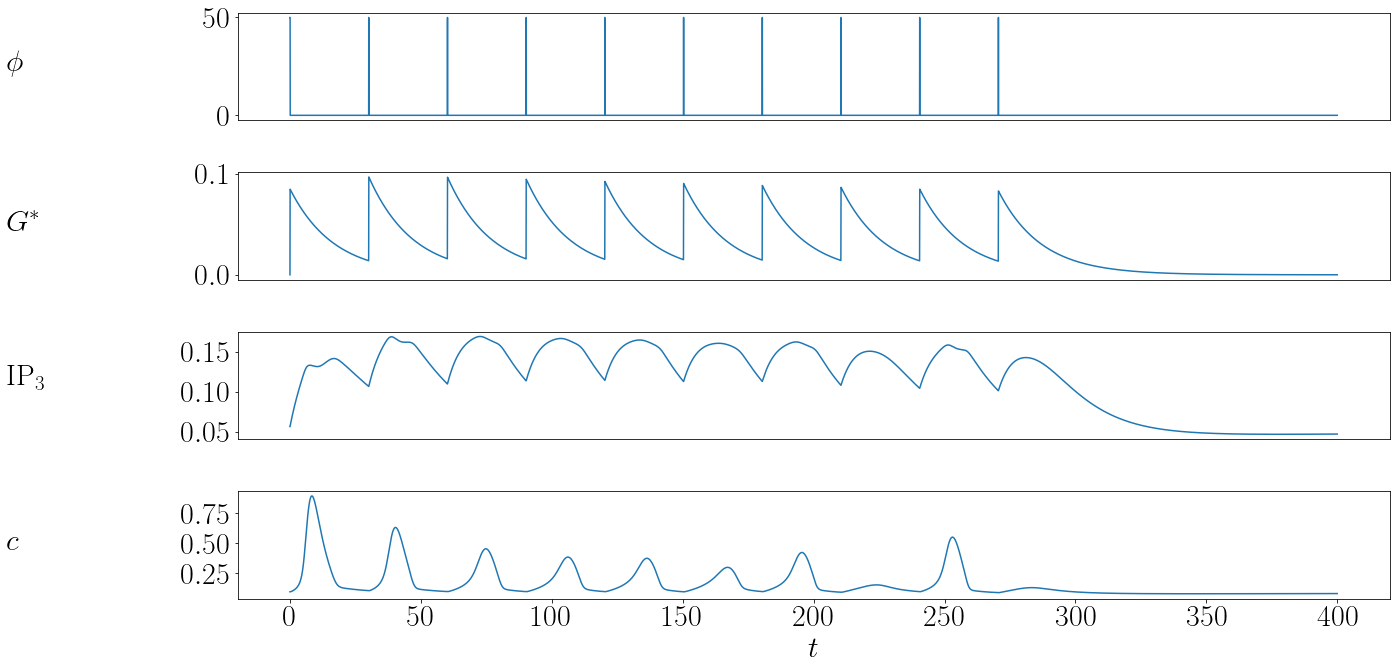

In [13]:
cfg.t_f = 400
cfg.input_duration = 400


fig, ax = plt.subplots(4, 1, figsize=(20, 10), sharey='row')

cfg.input_max = 50
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 30
cfg.num_oscillations = 10

set_gpcr_params(1)
run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])


fig.tight_layout()
# ax[0].legend()
plt.savefig('figures/full_spritz_comparison_30.png', bbox_inches='tight')


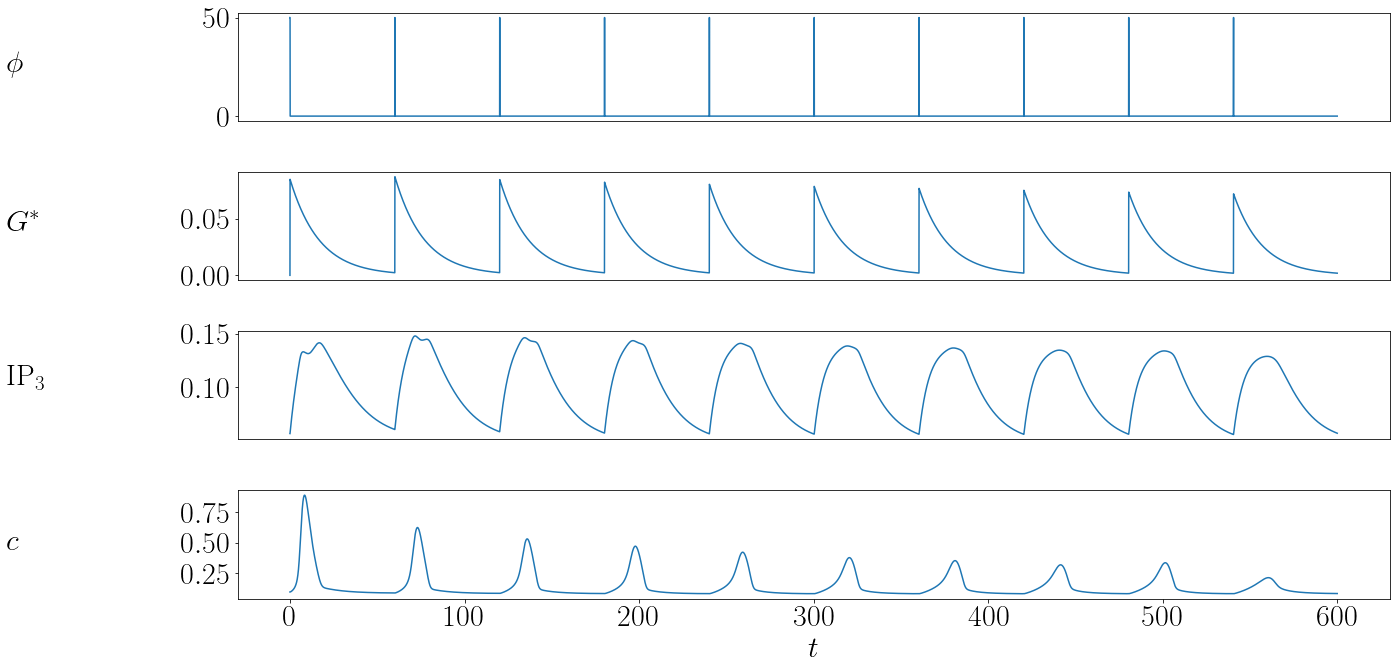

In [14]:
cfg.t_f = 600
cfg.input_duration = 600


fig, ax = plt.subplots(4, 1, figsize=(20, 10), sharey='row')

cfg.input_max = 50
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 60
cfg.num_oscillations = 10

set_gpcr_params(1)
run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])


fig.tight_layout()
# ax[0].legend()
plt.savefig('figures/full_spritz_comparison_60.png', bbox_inches='tight')


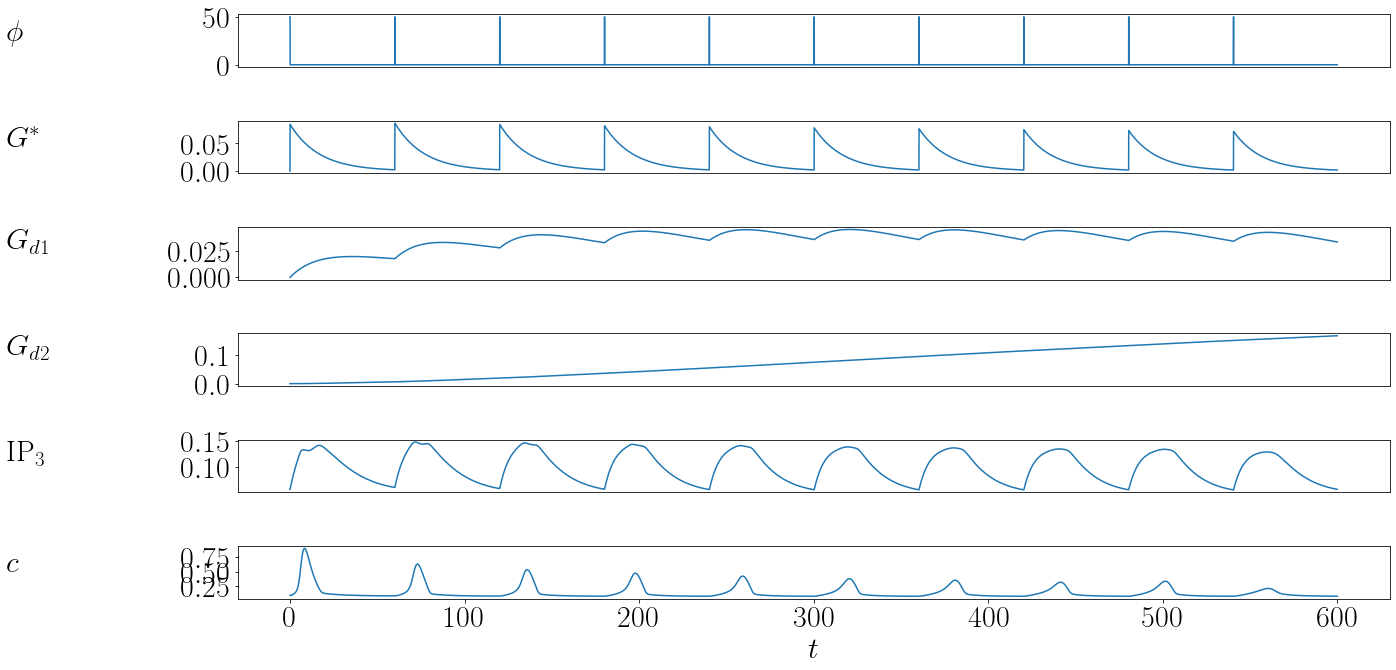

In [17]:
cfg.t_f = 600
cfg.input_duration = 600


fig, ax = plt.subplots(6, 1, figsize=(20, 10), sharey='row')

# cfg.input_max = 50
# cfg.oscillation_on_duration = 0.06
# cfg.oscillation_off_duration = 60
# cfg.num_oscillations = 10

# set_gpcr_params(1)
# run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2', 'p', 'c'], axs=ax[:], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])


fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_spritz_comparison_60.png', bbox_inches='tight')


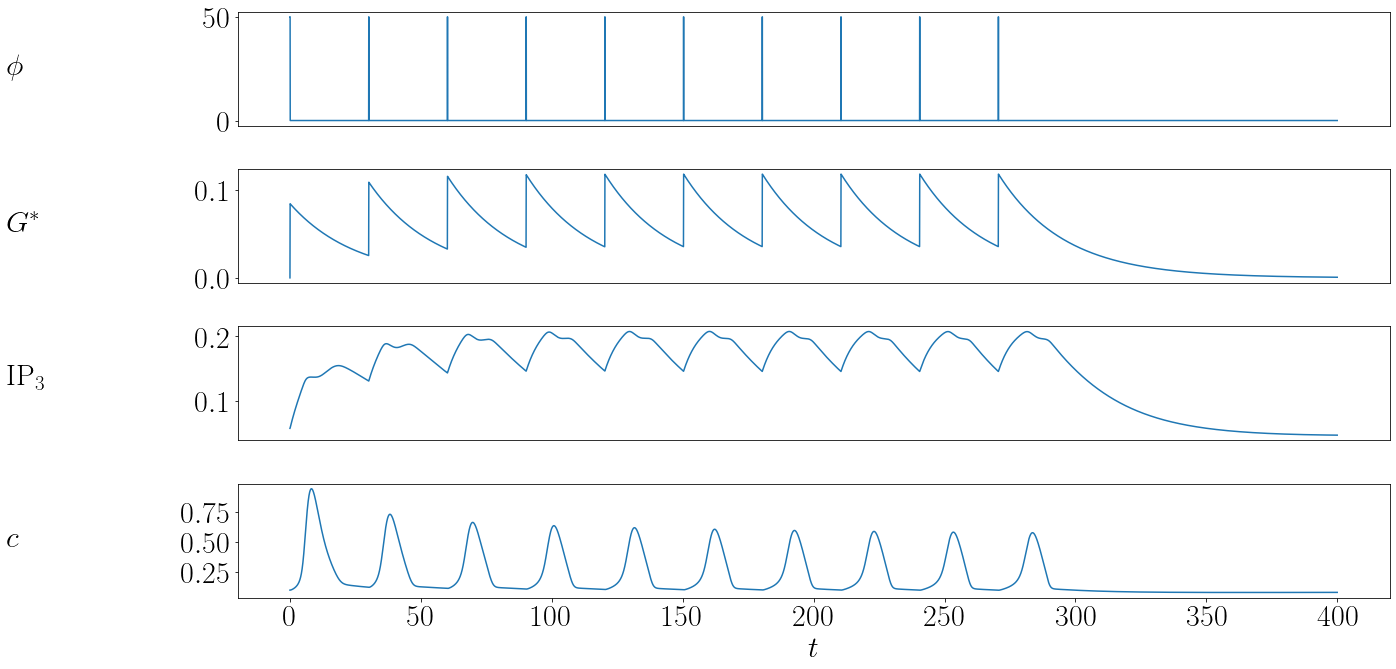

In [20]:
cfg.t_f = 400
cfg.input_duration = 400


fig, ax = plt.subplots(4, 1, figsize=(20, 10), sharey='row')

cfg.input_max = 50
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 30
cfg.num_oscillations = 10
cfg.kd2 = 0
cfg.kd1 = 0

# set_gpcr_params(1)
# run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])


fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_spritz_comparison_60.png', bbox_inches='tight')


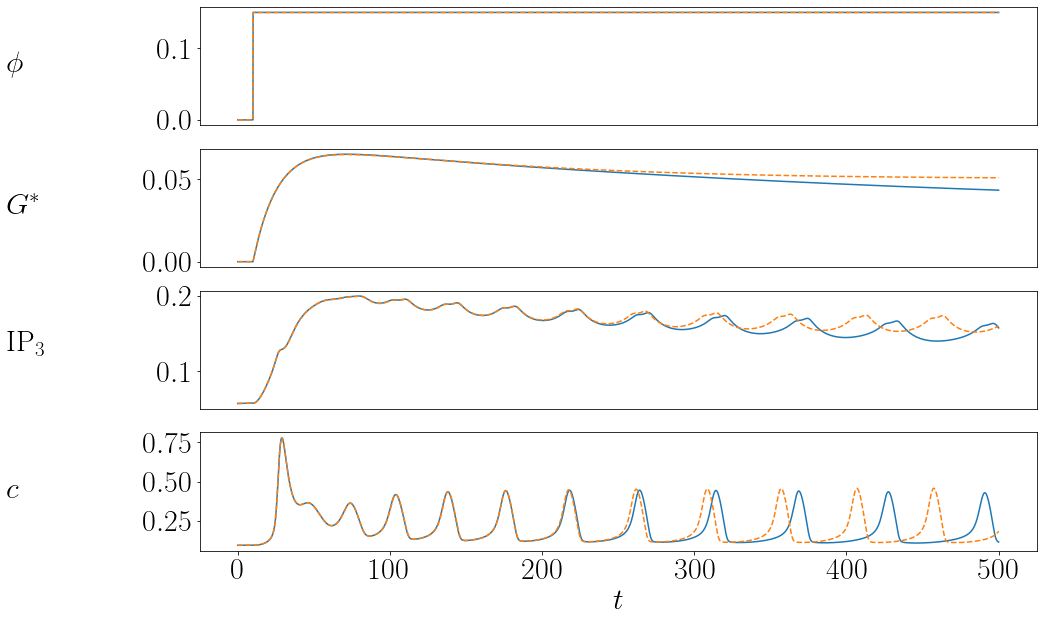

In [3]:
cfg.t_f = 500
cfg.input_duration = 500


fig, ax = plt.subplots(4, 1, figsize=(15,10))

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:], add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True)

set_gpcr_params(2)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax[:], add_xlabel=True, add_ylabels=True, 
                      legend_label='Old', linestyle='dashed')

# ax[0].legend()
plt.savefig('figures/param_set_pulse_comparison.png', bbox_inches='tight')


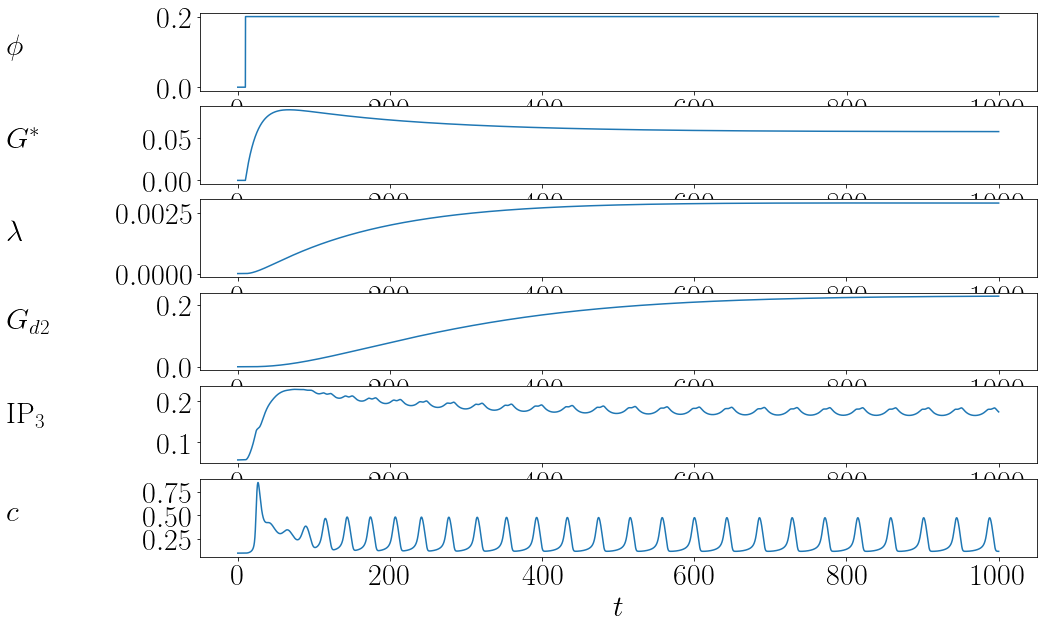

In [3]:
cfg.t_f = 1000
cfg.input_duration = 1000

# Gstars = [0.05, 0.1, 0.15]
# gluts = [0.2, 2, 10]
gluts = [0.2]

fig, ax = plt.subplots(6, 1, figsize=(15,10))

for i, input_max in enumerate(gluts):
    cfg.input_max = input_max
    
    run_experiment('pulse', t_f=cfg.t_f)
    add_labels = False
    if(i == 0):
        add_labels = True
    plot_experiment_plots(['glut', 'Gstar', 'lamb', 'Gd2', 'p', 'c'], axs=ax[:], add_xlabel=add_labels, add_ylabels=add_labels)
    


# Looking closer at spritz experiments

Looking at the ER calcium levels, it seems the depletion is mainly responsible for the absent spikes. As stimulation continues (after 10+ spikes) spikes become smaller due to slow desentization of the GPCR. 

It seems that whether a spike occurs or not is primarily a function of the ER calcium levels (and likely also the G* level, but this is largely constant at each stimulation). When a spritz occurs, if there is enough calcium in the ER, the calcium increases beyond a certain threshold limit which triggers the spike (as can be seen in the IP3 production trace, which has a secondary increase when a spike occurs. Thus the actual spike seems to be driven by Ca2+ -> IP3 positive feedback when it breaches the critical threshold).

**To confirm this, we should track the c_er, c, and G* levels at each stimulation to see if there is some clear threshold, and then we can test this by manually controlling the amount of ER calcium there is in experiment**

**We can record some summary statistics for each spike to see correlations (peaks reached by ip3, c, c_er, G*, etc)**

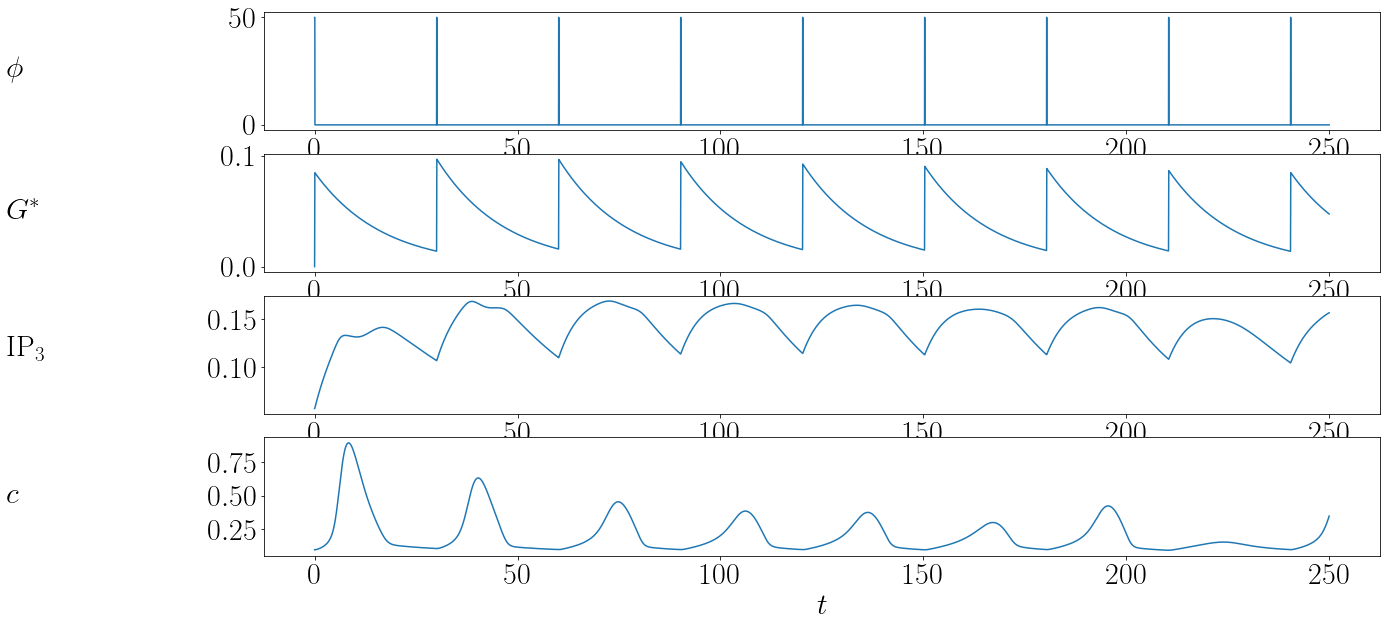

In [4]:
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
plot_experiment_plots(['glut', 'Gstar', 'p', 'c'], axs=ax)

In [18]:
#First run the experiment and save the data so we can easily analyze it

cfg.t_f = 1000
cfg.input_duration = 1000


# fig, ax = plt.subplots(4, 2, figsize=(20, 10), sharey='row')

cfg.input_max = 100
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 30
cfg.num_oscillations = 25

set_gpcr_params(1)
run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
save_experiment('100_0.06_30_25spritz_param_1')



Experiment saved


Experiment loaded


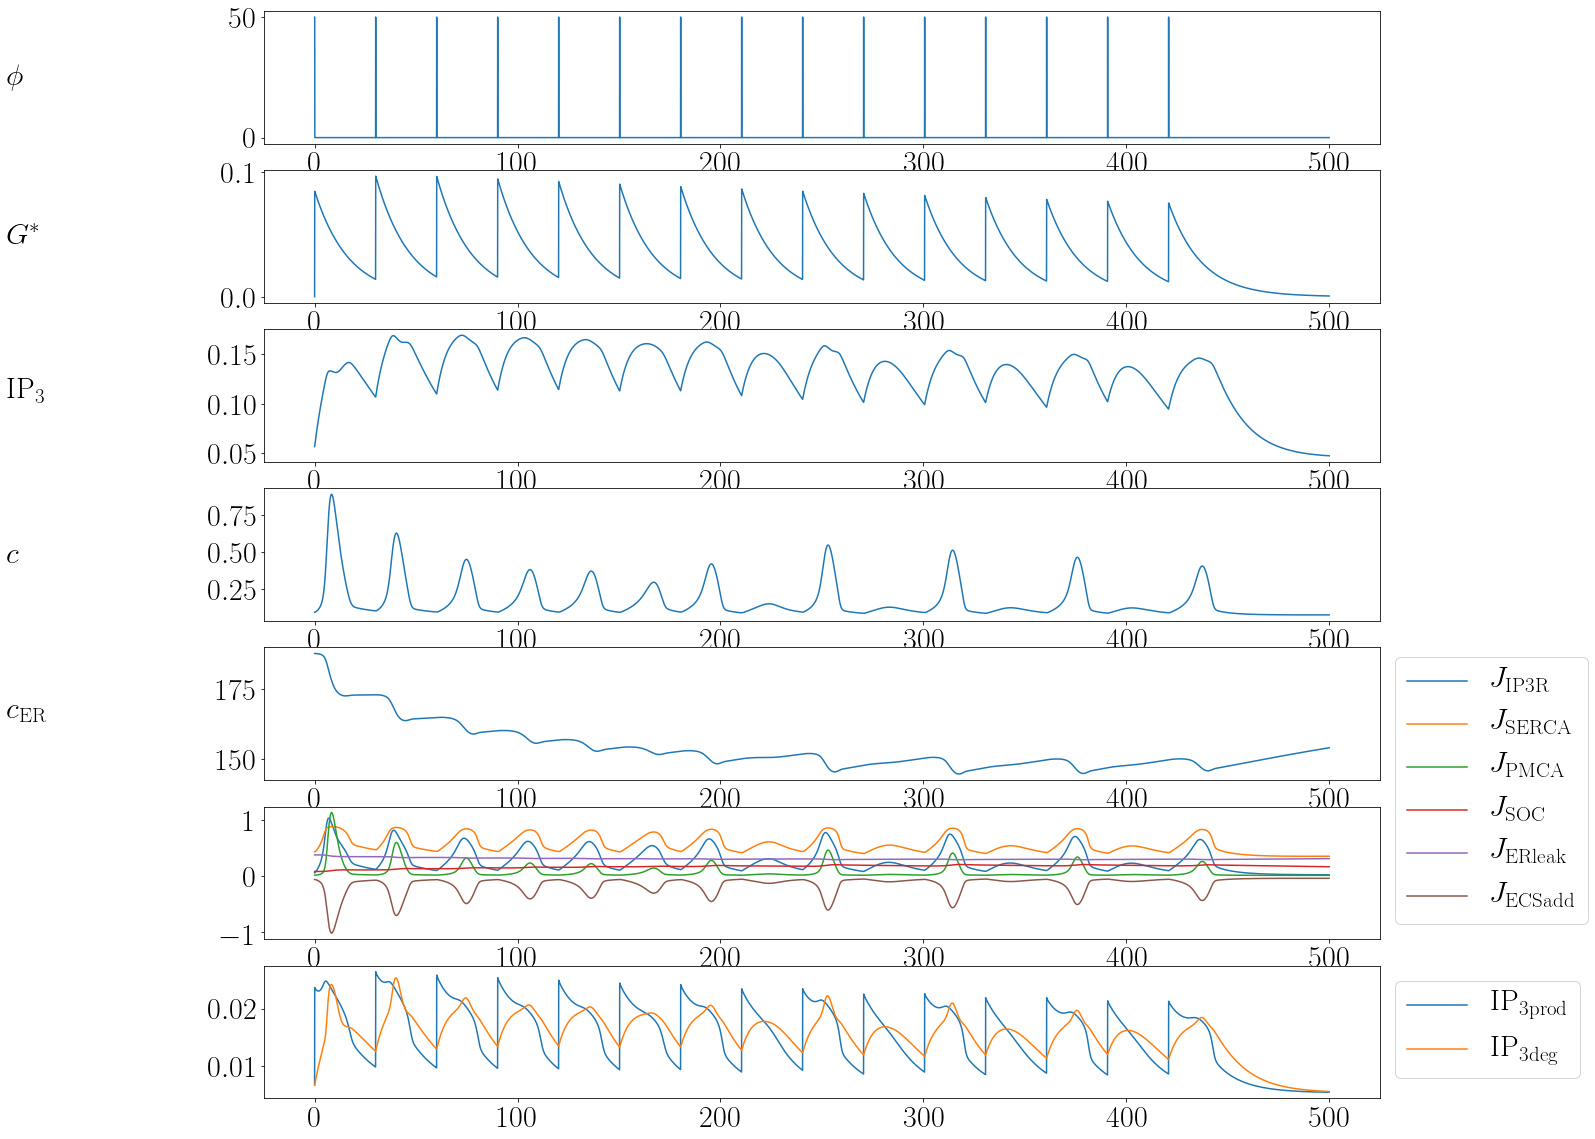

In [12]:
load_experiment('0.06_30_spritz_param_1')
labels = ['glut', 'Gstar', 'p', 'c', 'c_er']
flux_labels = {
    'J_ip3r': r'$J_\mathrm{IP3R}$',
    'J_serca': r'$J_\mathrm{SERCA}$',
    'J_pmca': r'$J_\mathrm{PMCA}$',
    'J_soc': r'$J_\mathrm{SOC}$',
    'J_er_leak': r'$J_\mathrm{ER leak}$',
    'J_ecs_add': r'$J_\mathrm{ECS add}$',
}
ip3_labels = {
    'ip3_production': r'IP$_{3\mathrm{prod}}$',
    'ip3_degradation': r'IP$_{3\mathrm{deg}}$'
}

fig, ax = plt.subplots(len(labels)+2, 1, figsize=(20, 20))
plot_experiment_plots(labels, axs=ax)
for i, label in enumerate(flux_labels.keys()):
    color = color_cycle[i]
    ax[len(labels)].plot(cfg.t, getattr(cfg, label), c=color, label=flux_labels[label])

for i, label in enumerate(ip3_labels.keys()):
    color = color_cycle[i]
    ax[len(labels) + 1].plot(cfg.t, getattr(cfg, label), c=color, label=ip3_labels[label])
    
ax[len(labels)].legend(loc='lower left', bbox_to_anchor=(1, 0))
ax[len(labels) + 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

Experiment loaded


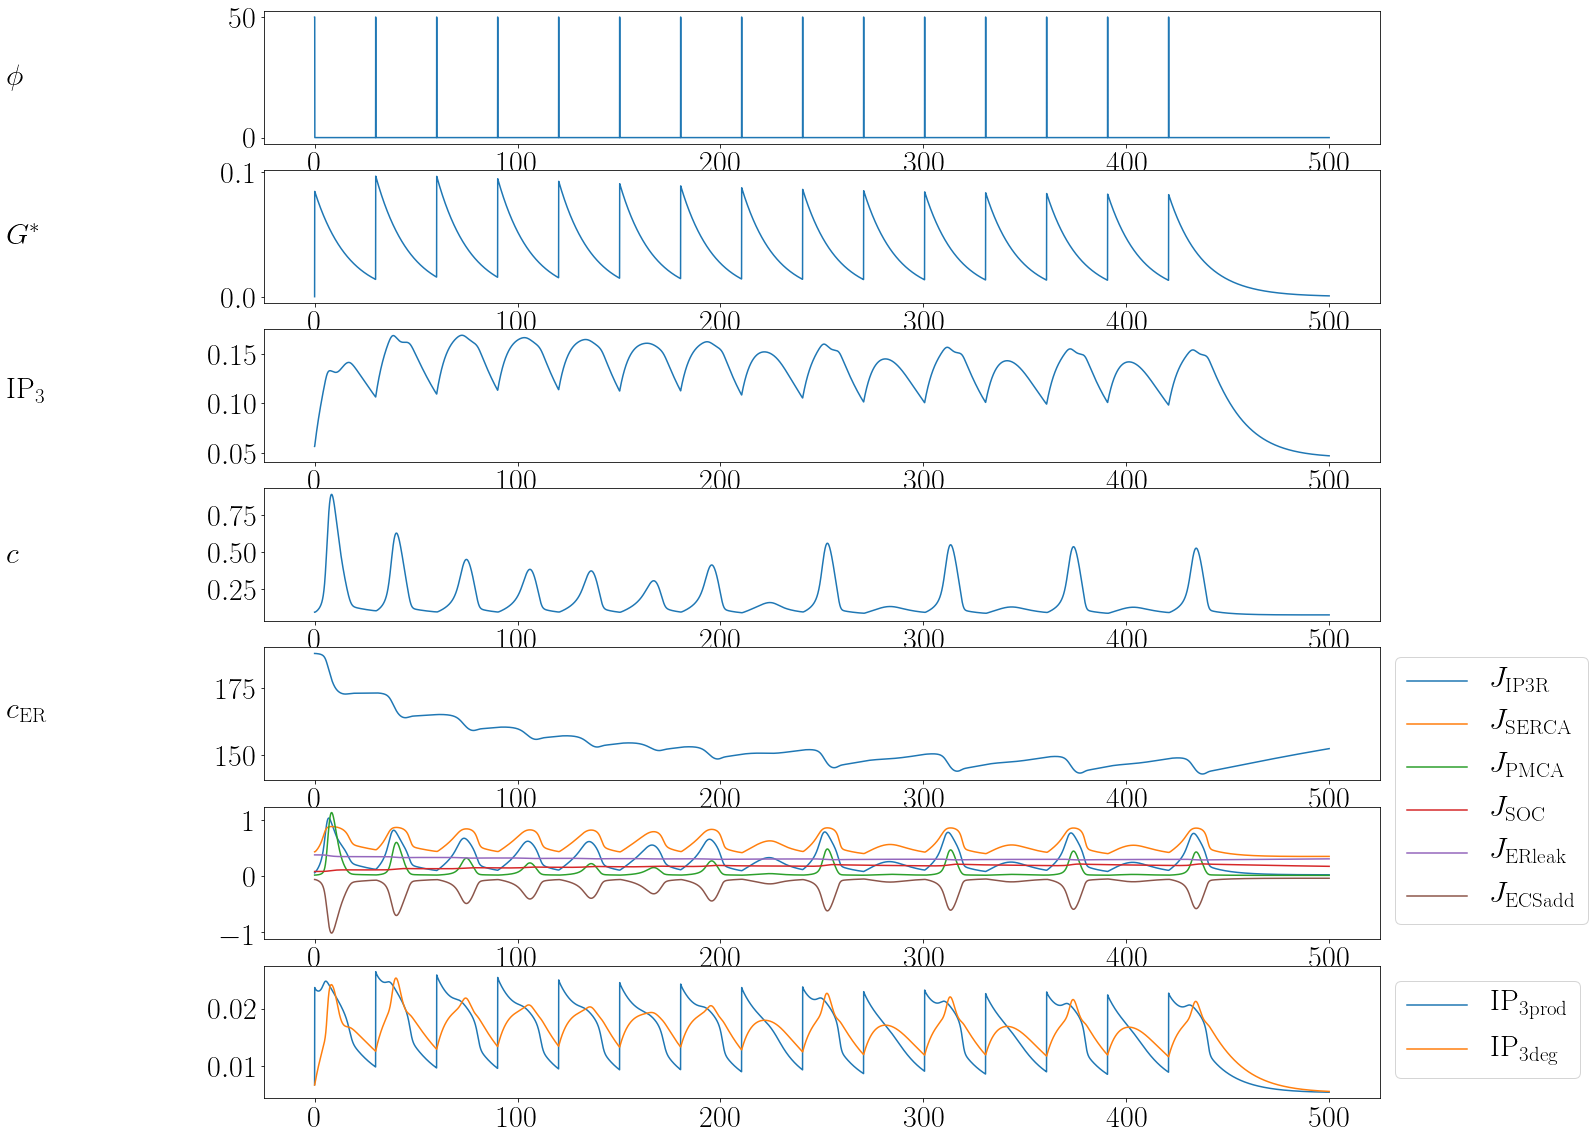

In [16]:
load_experiment('0.06_30_spritz_param_2')
labels = ['glut', 'Gstar', 'p', 'c', 'c_er']
flux_labels = {
    'J_ip3r': r'$J_\mathrm{IP3R}$',
    'J_serca': r'$J_\mathrm{SERCA}$',
    'J_pmca': r'$J_\mathrm{PMCA}$',
    'J_soc': r'$J_\mathrm{SOC}$',
    'J_er_leak': r'$J_\mathrm{ER leak}$',
    'J_ecs_add': r'$J_\mathrm{ECS add}$',
}
ip3_labels = {
    'ip3_production': r'IP$_{3\mathrm{prod}}$',
    'ip3_degradation': r'IP$_{3\mathrm{deg}}$'
}

fig, ax = plt.subplots(len(labels)+2, 1, figsize=(20, 20))
plot_experiment_plots(labels, axs=ax)
for i, label in enumerate(flux_labels.keys()):
    color = color_cycle[i]
    ax[len(labels)].plot(cfg.t, getattr(cfg, label), c=color, label=flux_labels[label])

for i, label in enumerate(ip3_labels.keys()):
    color = color_cycle[i]
    ax[len(labels) + 1].plot(cfg.t, getattr(cfg, label), c=color, label=ip3_labels[label])
    
ax[len(labels)].legend(loc='lower left', bbox_to_anchor=(1, 0))
ax[len(labels) + 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

Experiment loaded


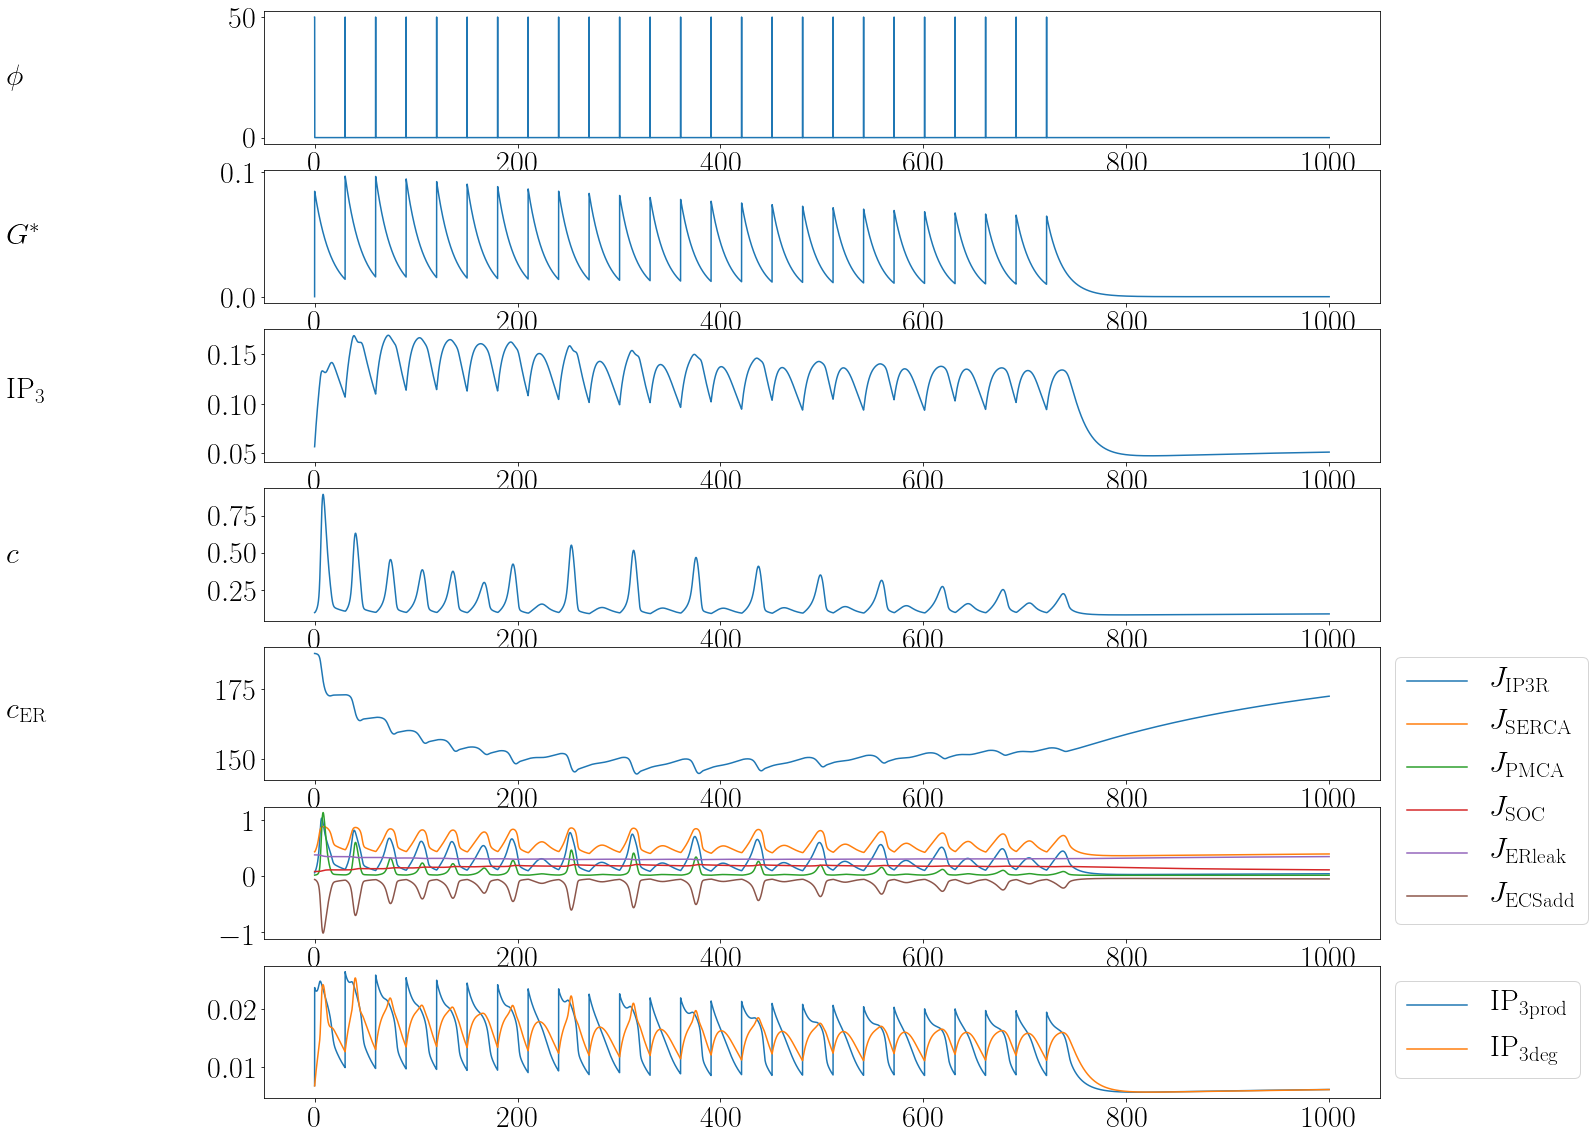

In [17]:
load_experiment('0.06_30_25spritz_param_1')
labels = ['glut', 'Gstar', 'p', 'c', 'c_er']
flux_labels = {
    'J_ip3r': r'$J_\mathrm{IP3R}$',
    'J_serca': r'$J_\mathrm{SERCA}$',
    'J_pmca': r'$J_\mathrm{PMCA}$',
    'J_soc': r'$J_\mathrm{SOC}$',
    'J_er_leak': r'$J_\mathrm{ER leak}$',
    'J_ecs_add': r'$J_\mathrm{ECS add}$',
}
ip3_labels = {
    'ip3_production': r'IP$_{3\mathrm{prod}}$',
    'ip3_degradation': r'IP$_{3\mathrm{deg}}$'
}

fig, ax = plt.subplots(len(labels)+2, 1, figsize=(20, 20))
plot_experiment_plots(labels, axs=ax)
for i, label in enumerate(flux_labels.keys()):
    color = color_cycle[i]
    ax[len(labels)].plot(cfg.t, getattr(cfg, label), c=color, label=flux_labels[label])

for i, label in enumerate(ip3_labels.keys()):
    color = color_cycle[i]
    ax[len(labels) + 1].plot(cfg.t, getattr(cfg, label), c=color, label=ip3_labels[label])
    
ax[len(labels)].legend(loc='lower left', bbox_to_anchor=(1, 0))
ax[len(labels) + 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

Experiment loaded


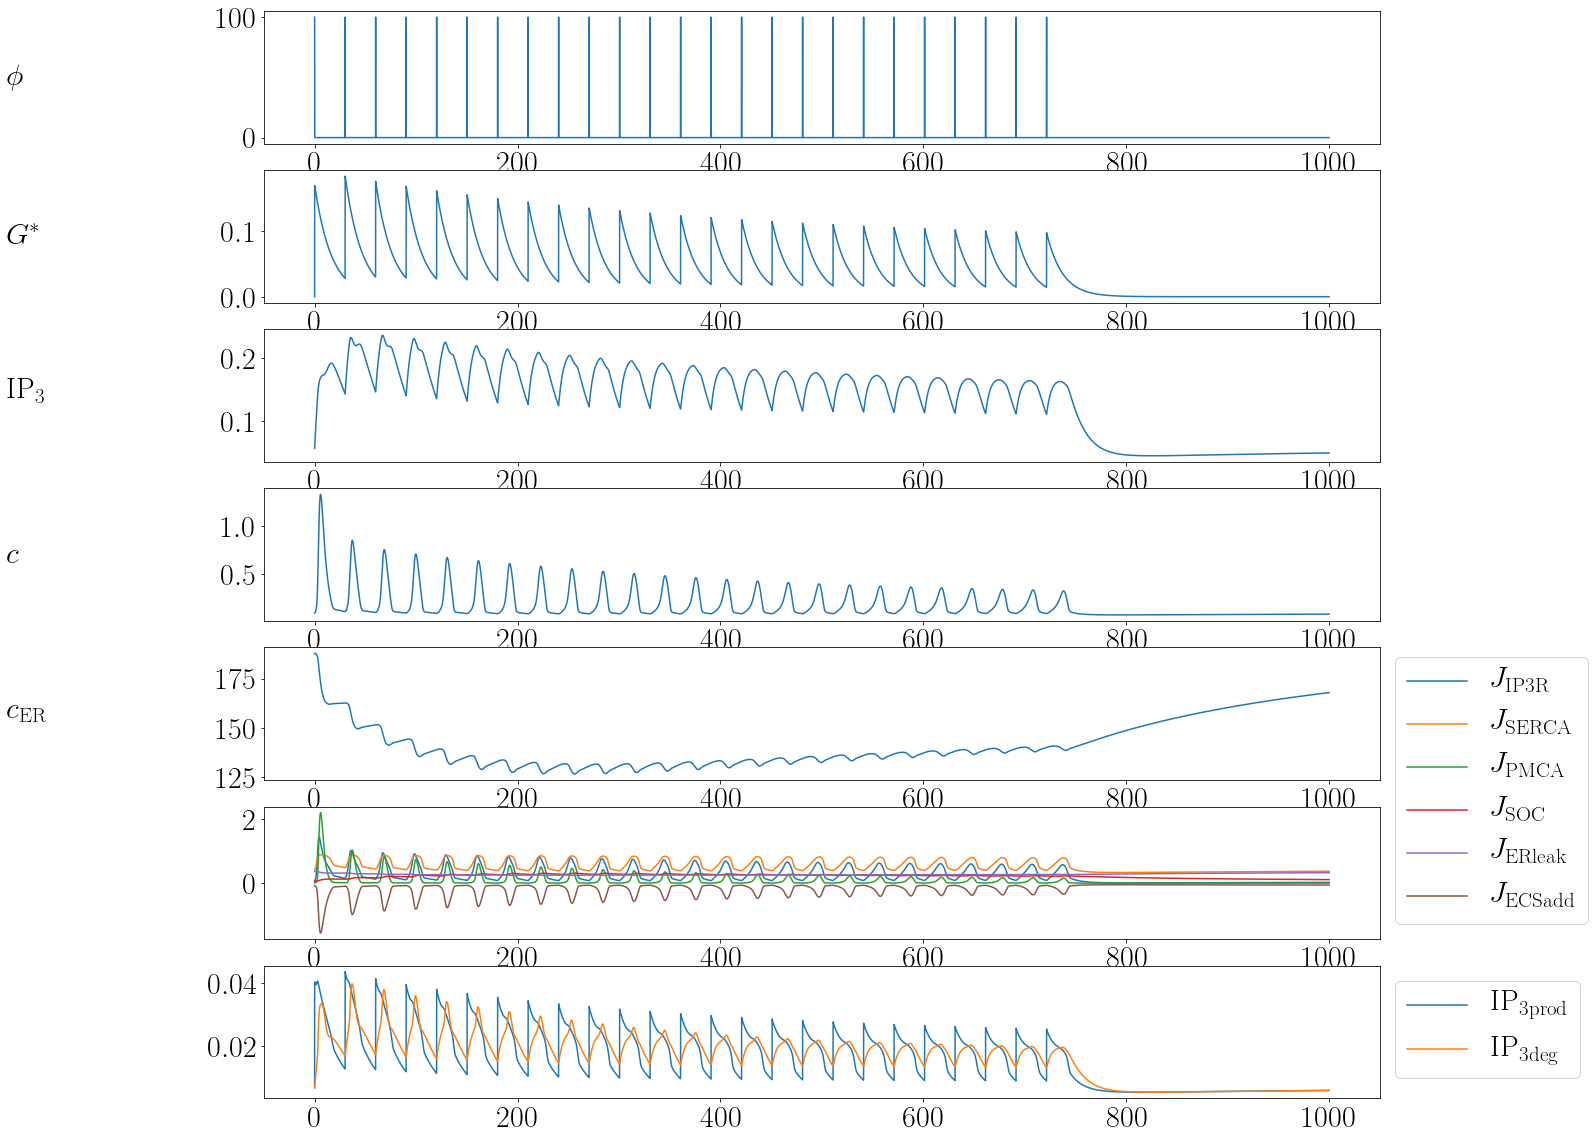

In [19]:
load_experiment('100_0.06_30_25spritz_param_1')
labels = ['glut', 'Gstar', 'p', 'c', 'c_er']
flux_labels = {
    'J_ip3r': r'$J_\mathrm{IP3R}$',
    'J_serca': r'$J_\mathrm{SERCA}$',
    'J_pmca': r'$J_\mathrm{PMCA}$',
    'J_soc': r'$J_\mathrm{SOC}$',
    'J_er_leak': r'$J_\mathrm{ER leak}$',
    'J_ecs_add': r'$J_\mathrm{ECS add}$',
}
ip3_labels = {
    'ip3_production': r'IP$_{3\mathrm{prod}}$',
    'ip3_degradation': r'IP$_{3\mathrm{deg}}$'
}

fig, ax = plt.subplots(len(labels)+2, 1, figsize=(20, 20))
plot_experiment_plots(labels, axs=ax)
for i, label in enumerate(flux_labels.keys()):
    color = color_cycle[i]
    ax[len(labels)].plot(cfg.t, getattr(cfg, label), c=color, label=flux_labels[label])

for i, label in enumerate(ip3_labels.keys()):
    color = color_cycle[i]
    ax[len(labels) + 1].plot(cfg.t, getattr(cfg, label), c=color, label=ip3_labels[label])
    
ax[len(labels)].legend(loc='lower left', bbox_to_anchor=(1, 0))
ax[len(labels) + 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

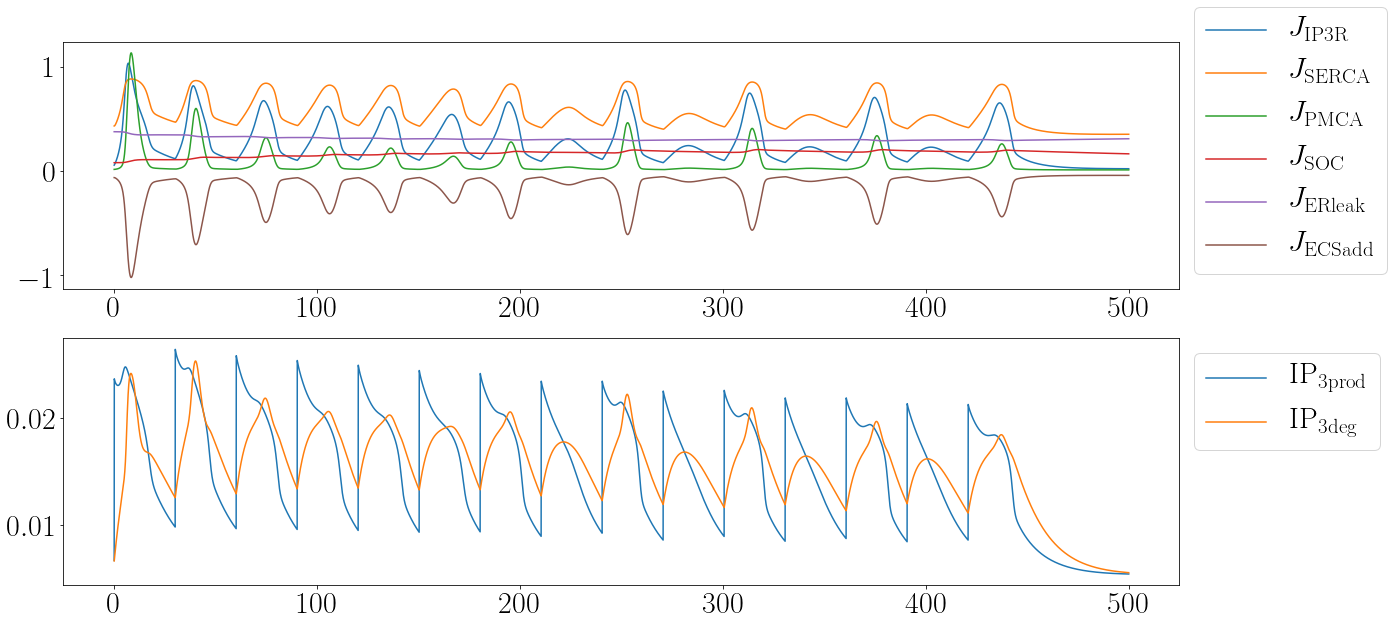

In [13]:
# Zoom to just the fluxes

flux_labels = {
    'J_ip3r': r'$J_\mathrm{IP3R}$',
    'J_serca': r'$J_\mathrm{SERCA}$',
    'J_pmca': r'$J_\mathrm{PMCA}$',
    'J_soc': r'$J_\mathrm{SOC}$',
    'J_er_leak': r'$J_\mathrm{ER leak}$',
    'J_ecs_add': r'$J_\mathrm{ECS add}$',
}
ip3_labels = {
    'ip3_production': r'IP$_{3\mathrm{prod}}$',
    'ip3_degradation': r'IP$_{3\mathrm{deg}}$'
}

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
for i, label in enumerate(flux_labels.keys()):
    color = color_cycle[i]
    ax[0].plot(cfg.t, getattr(cfg, label), c=color, label=flux_labels[label])

for i, label in enumerate(ip3_labels.keys()):
    color = color_cycle[i]
    ax[1].plot(cfg.t, getattr(cfg, label), c=color, label=ip3_labels[label])
    
ax[0].legend(loc='lower left', bbox_to_anchor=(1, 0))
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

### Testing with controlled ER calcium and spritz strengths

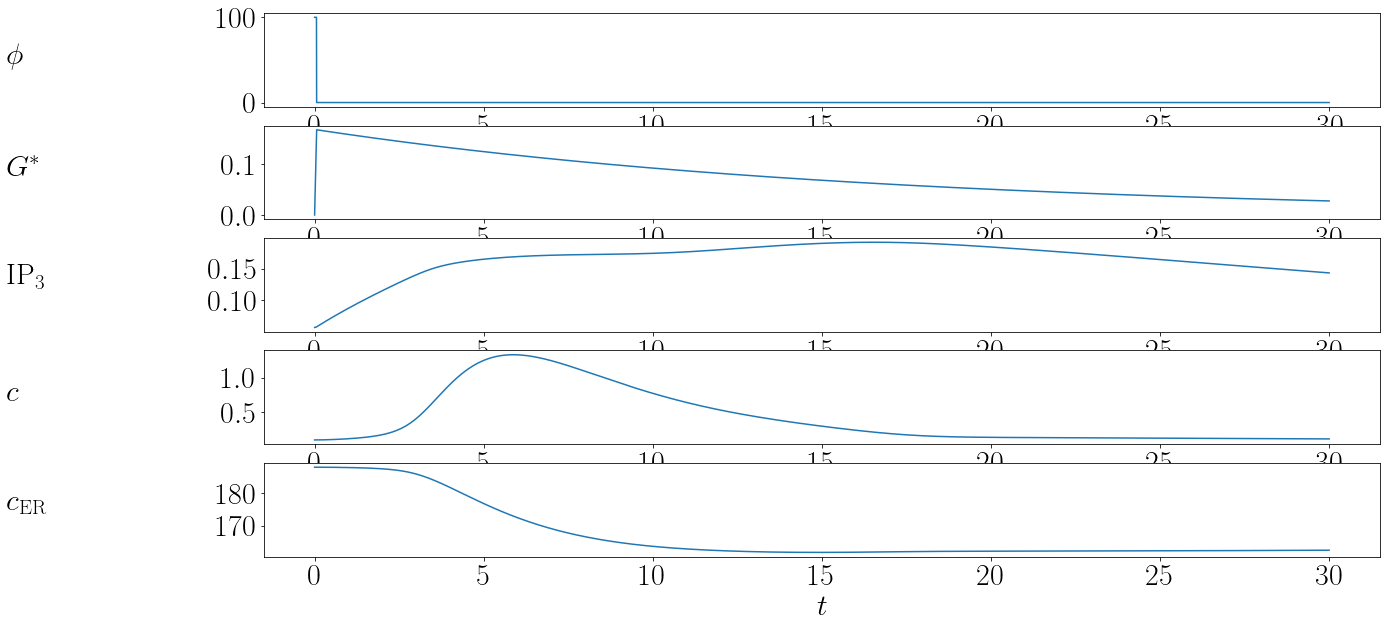

In [5]:
#First run the experiment and save the data so we can easily analyze it

c_0 = 0.0951442
c_tot_0_default = 34.841184
c_er_0 = 100
c_tot_0 = (c_er_0 / cfg.gamma) + c_0
# cfg.all_init[1] = c_tot_0


cfg.t_f = 30
cfg.input_duration = 30


fig, ax = plt.subplots(5, 1, figsize=(20, 10), sharey='row')

cfg.input_max = 100
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 30
cfg.num_oscillations = 1

set_gpcr_params(1)
run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], ax)

cfg.all_init[1] = c_tot_0_default

In [39]:
%%time
#First run the experiment and save the data so we can easily analyze it

c_0 = 0.0951442
c_tot_0_default = 34.841184

c_er_inits = np.arange(100, 201, 5)
input_maxes = np.arange(0, 101, 5)

#range of test values
# c_er_inits = np.arange(150, 161, 5)
# input_maxes = np.arange(0, 101, 50)

cfg.t_f = 40
cfg.input_duration = 40


# fig, ax = plt.subplots(5, 1, figsize=(20, 10), sharey='row')

cfg.input_max = 100
cfg.oscillation_on_duration = 0.06
cfg.oscillation_off_duration = 30
cfg.num_oscillations = 1

set_gpcr_params(1)

c_er_plot = []
input_max_plot = []
gstar_peaks = []
ip3_peaks = []
c_peaks = []
c_er_peaks = []


for c_er_0 in tqdm(c_er_inits):
    for input_max in input_maxes:
        c_er_plot.append(c_er_0)
        input_max_plot.append(input_max)
        
        c_tot_0 = (c_er_0 / cfg.gamma) + c_0
        cfg.input_max = input_max
        cfg.all_init[1] = c_tot_0
                
        run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
        
        #readout max
        gstar_peaks.append(np.max(cfg.Gstar))
        ip3_peaks.append(np.max(cfg.p))
        c_peaks.append(np.max(cfg.c))
        c_er_peaks.append(np.max(cfg.c_er))
        
# plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], ax)

data_dict = {
'c_er_plot': c_er_plot,
'input_max_plot': input_max_plot,
'gstar_peaks': gstar_peaks,
'ip3_peaks': ip3_peaks,
'c_peaks': c_peaks,
'c_er_peaks': c_er_peaks
}
pickle.dump(data_dict, open('data/experiments/spritz_peaks', 'wb'))


cfg.all_init[1] = c_tot_0_default

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [20:19<00:00, 58.05s/it]

Wall time: 20min 19s


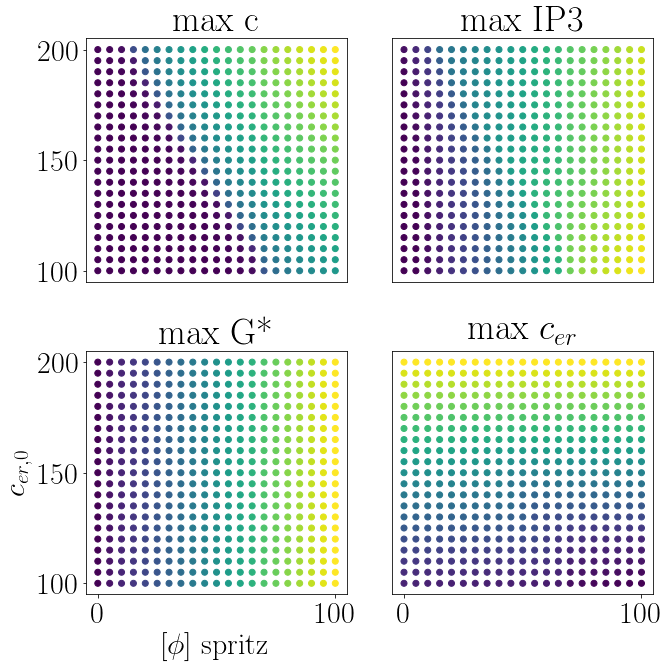

In [20]:
data_dict = pickle.load(open('data/experiments/spritz_peaks', 'rb'))
c_er_plot = data_dict['c_er_plot']
input_max_plot = data_dict['input_max_plot']
gstar_peaks = data_dict['gstar_peaks']
ip3_peaks = data_dict['ip3_peaks']
c_peaks = data_dict['c_peaks']
c_er_peaks = data_dict['c_er_peaks']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0,0].scatter(input_max_plot, c_er_plot, c=c_peaks)
ax[0,0].set_title('max c')
ax[0,0].set_xticks([])
ax[1,0].scatter(input_max_plot, c_er_plot, c=gstar_peaks)
ax[1,0].set_title('max G*')
ax[1,0].set_ylabel('$c_{er,0}$')
ax[1,0].set_xlabel('[$\phi$] spritz')
ax[0,1].scatter(input_max_plot, c_er_plot, c=ip3_peaks)
ax[0,1].set_title('max IP3')
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[1,1].scatter(input_max_plot, c_er_plot, c=c_er_peaks)
ax[1,1].set_title('max $c_{er}$')
ax[1,1].set_yticks([])
plt.tight_layout()

Text(0.5, 1.0, 'c peaks')

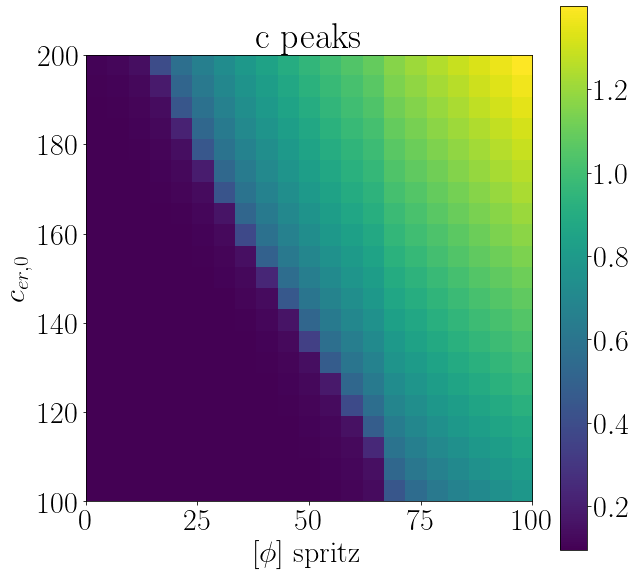

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(np.flip(np.array(c_peaks).reshape(21, 21), 0), extent=(0, 100, 100, 200))
plt.colorbar()
plt.ylabel('$c_{er,0}$')
plt.xlabel('[$\phi$] spritz')
plt.title('c peaks')

Text(0.5, 1.0, 'G* peaks')

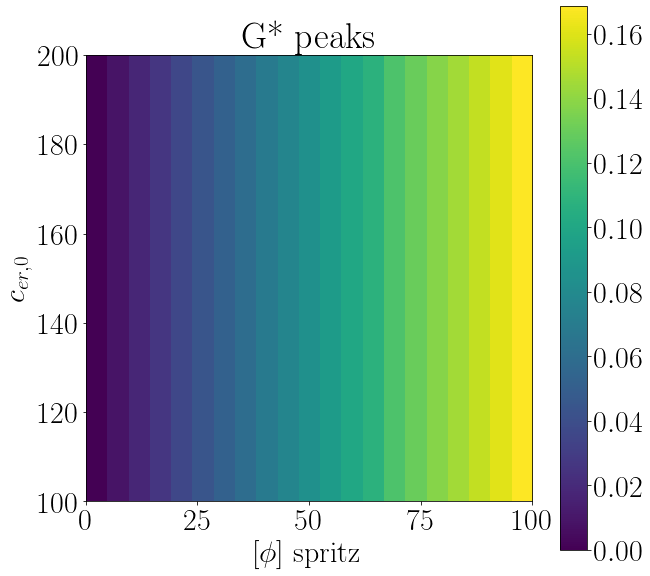

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(np.flip(np.array(gstar_peaks).reshape(21, 21), 0), extent=(0, 100, 100, 200))
plt.colorbar()
plt.ylabel('$c_{er,0}$')
plt.xlabel('[$\phi$] spritz')
plt.title('G* peaks')

# Run a bunch of experiments

In [3]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
#First run the experiment and save the data so we can easily analyze it

input_maxes = np.arange(91, 100)


cfg.t_f = 2000
cfg.input_duration = 2000

for input_max in tqdm(input_maxes):
    # fig, ax = plt.subplots(4, 2, figsize=(20, 10), sharey='row')

    cfg.input_max = input_max
    cfg.oscillation_on_duration = 0.06
    cfg.oscillation_off_duration = 30
    cfg.num_oscillations = 50

    run_experiment('oscillation', t_f=cfg.t_f, max_step=0.005)
    save_experiment(str(input_max) + '_0.06_30_50')

 11%|█████████▏                                                                         | 1/9 [04:44<37:53, 284.13s/it]

Experiment saved


 22%|██████████████████▍                                                                | 2/9 [09:49<33:54, 290.58s/it]

Experiment saved


 33%|███████████████████████████▋                                                       | 3/9 [14:50<29:21, 293.62s/it]

Experiment saved


 44%|████████████████████████████████████▉                                              | 4/9 [19:51<24:38, 295.76s/it]

Experiment saved


 56%|██████████████████████████████████████████████                                     | 5/9 [25:00<19:59, 299.75s/it]

Experiment saved


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [30:16<15:14, 304.80s/it]

Experiment saved


# Changing G* -> IP3 activation

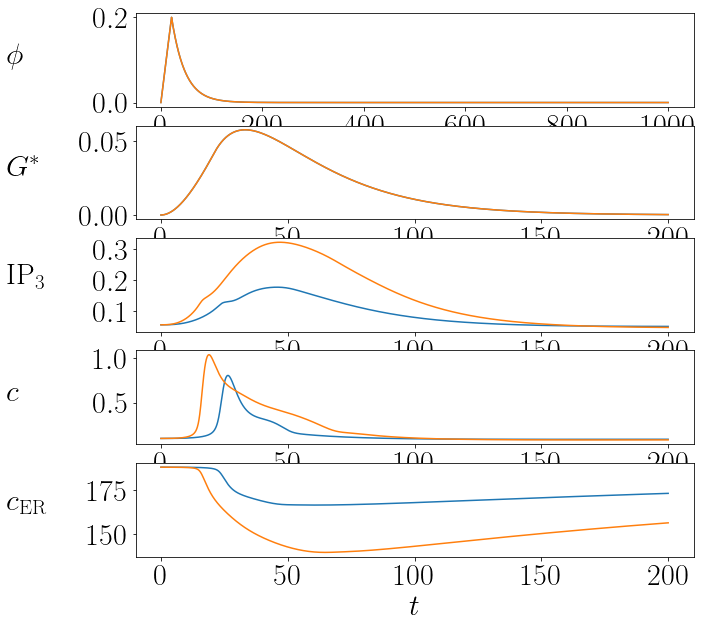

In [4]:
set_ip3_curve('SP')
t_f = 200

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

run_experiment('curve', t_f=t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], ax)

cfg.v_beta = 0.6

run_experiment('curve', t_f=t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], ax)

cfg.v_beta = 0.2

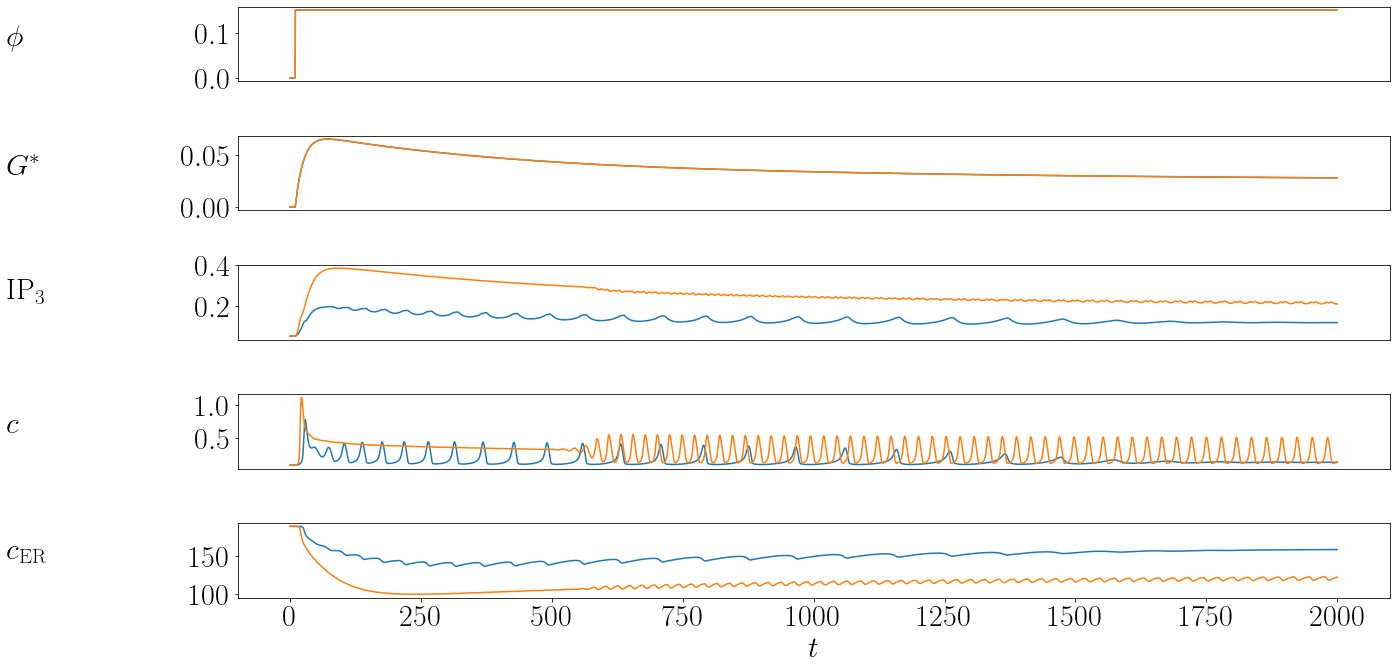

In [5]:
cfg.t_f = 2000
cfg.input_duration = 2000


fig, ax = plt.subplots(5, 1, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.6

run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.2

fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_pulse_comparison2.png', bbox_inches='tight')


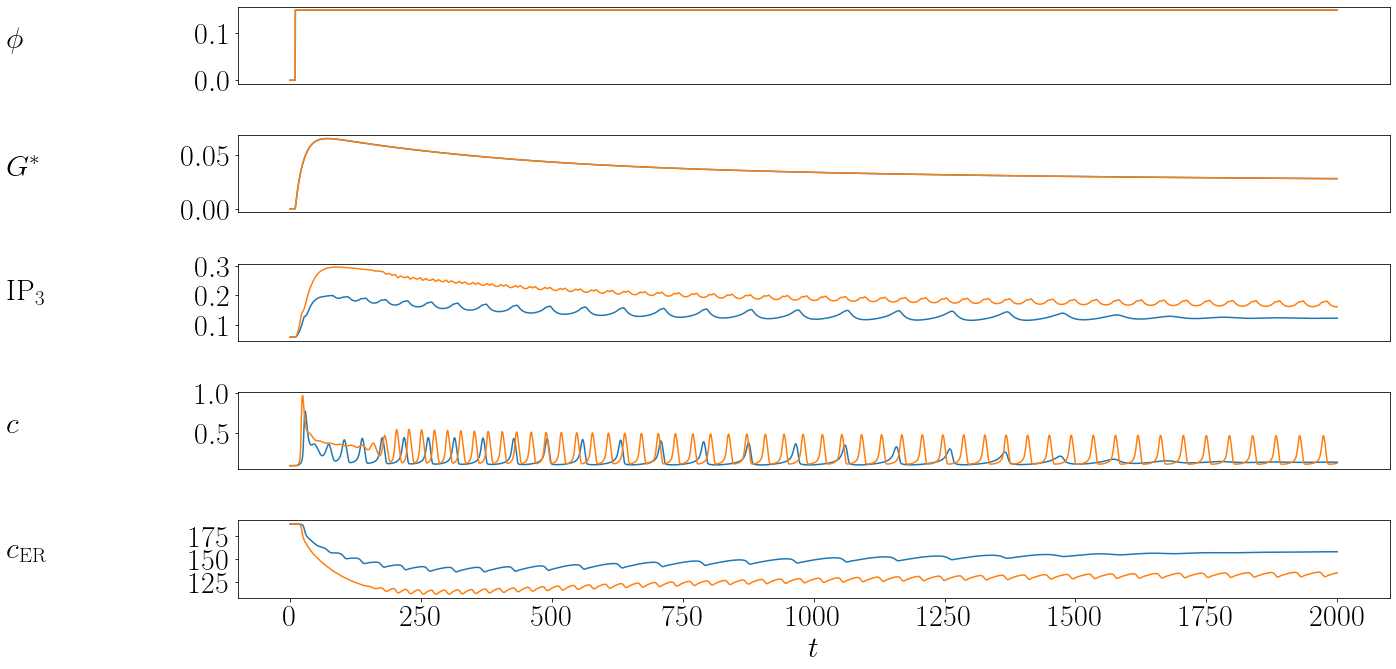

In [6]:
cfg.t_f = 2000
cfg.input_duration = 2000


fig, ax = plt.subplots(5, 1, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.4

run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.2

fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_pulse_comparison2.png', bbox_inches='tight')


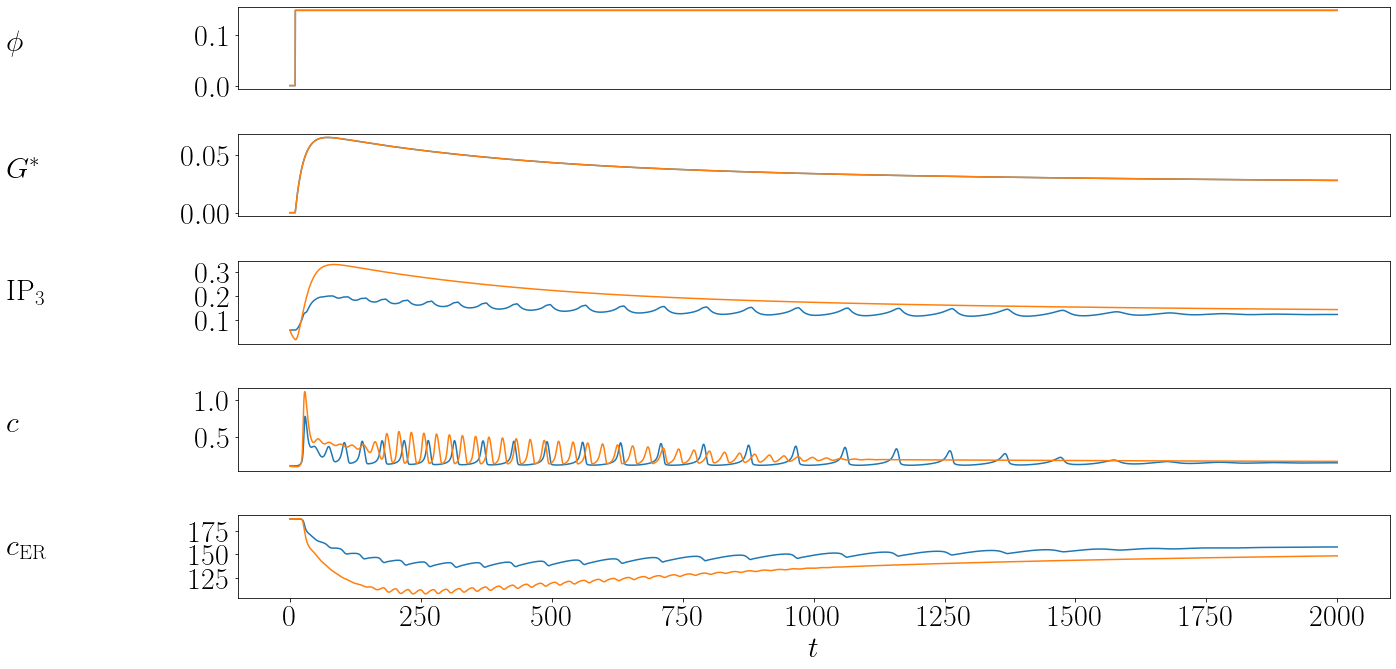

In [4]:
cfg.t_f = 2000
cfg.input_duration = 2000


fig, ax = plt.subplots(5, 1, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.6
cfg.v_delta = 0
cfg.v_3k = 0

run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.2
cfg.v_delta = 0.01
cfg.v_3k = 0.1

fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_pulse_comparison2.png', bbox_inches='tight')


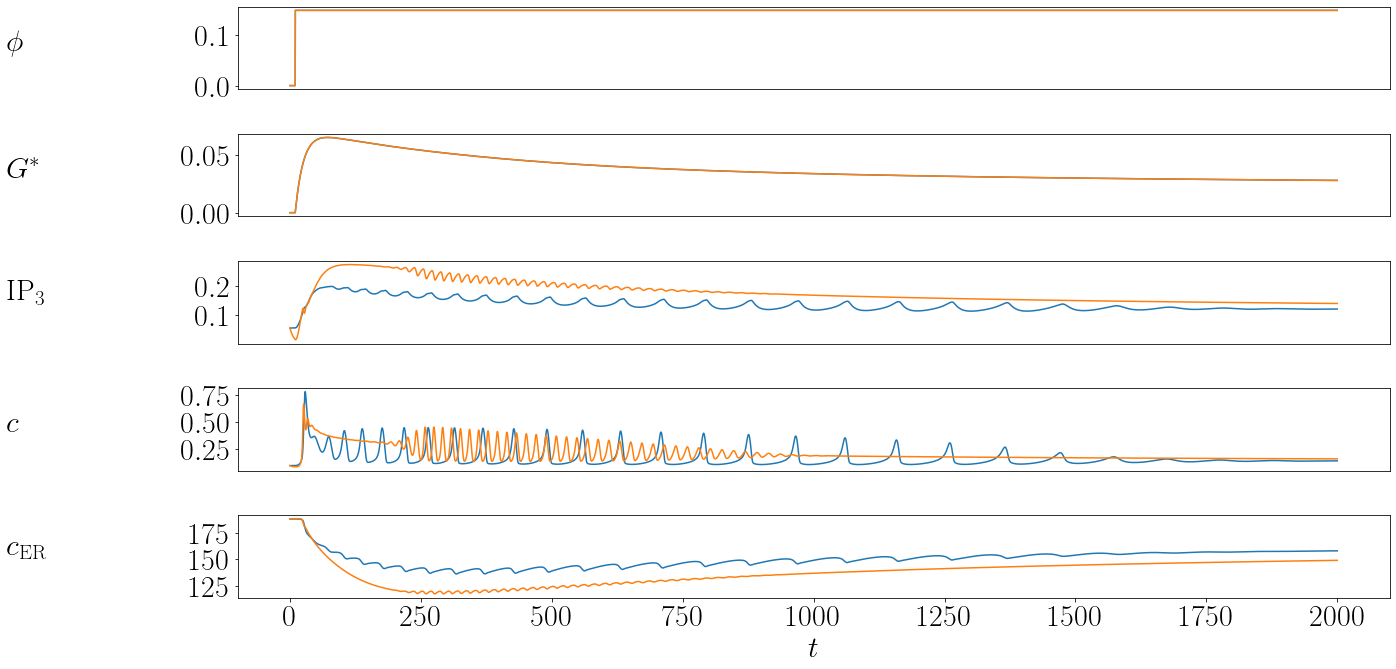

In [5]:
cfg.t_f = 2000
cfg.input_duration = 2000


fig, ax = plt.subplots(5, 1, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.6
cfg.v_delta = 0
cfg.v_3k = 0.5

run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.2
cfg.v_delta = 0.01
cfg.v_3k = 0.1

fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_pulse_comparison2.png', bbox_inches='tight')


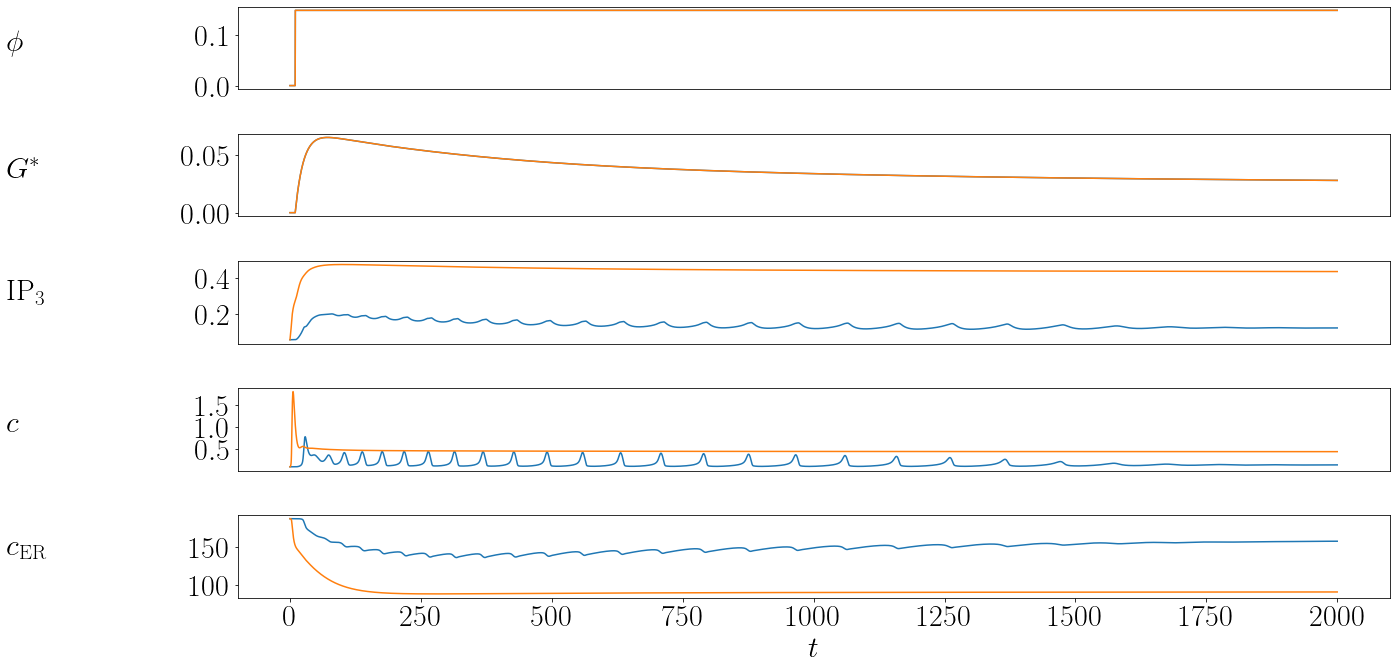

In [6]:
cfg.t_f = 2000
cfg.input_duration = 2000


fig, ax = plt.subplots(5, 1, figsize=(20,10), sharey='row')

cfg.input_max = 0.15

set_gpcr_params(1)
run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.2
cfg.v_delta = 0.05
cfg.v_3k = 0.1

run_experiment('pulse', t_f=cfg.t_f)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c', 'c_er'], axs=ax, add_xlabel=True, add_ylabels=True, legend_label='New',
                     remove_xticks=True, ylabel_padding=[-0.2, 0.4])

cfg.v_beta = 0.2
cfg.v_delta = 0.01
cfg.v_3k = 0.1

fig.tight_layout()
# ax[0].legend()
# plt.savefig('figures/full_pulse_comparison2.png', bbox_inches='tight')


## More systematic approach

First, going to see how the IP3 responses we want look like, then see what glutamate pulses are needed to produce these

In [14]:
A_range = [0.05, 0.1, 0.2, 0.3, 0.4]
# r_rise_range = [0.002, 0.04, 0.07, 0.09, 0.12, 
#          0.15, 0.3, 0.44, 0.8, 1, 1.5, 12]
#r_rise_range = [0.002, 0.04, 0.012, 0.3, 0.8, 1.5, 12]
d_decay_range = [15, 56, 97, 138, 179, 220]
d_rise_range = [1, 11, 21, 31, 41]

# total_trials = len(A_range) * len(r_rise_range) * len(d_decay_range) * len(d_rise_range)
trial_count = 0

maxes = []
ints = []

results_rows = []
for A in A_range:
    for d_rise in d_rise_range:
        if d_rise < 8:
            r_rise_range = [0.002, 12]
        elif d_rise < 15:
            r_rise_range = [0.002, 0.44, 1.6]
        elif d_rise < 30:
            r_rise_range = [0.002, 0.12, 0.3, 1]
        elif d_rise < 40:
            r_rise_range = [0.003, 0.07, 0.15, 0.3, 0.8]
        else:
            r_rise_range = [0.002, 0.04, 0.09, 0.15, 0.3, 0.8]
            
        for r_rise in r_rise_range:
            for d_decay in d_decay_range:
                r_decay = compute_r_decay(A, d_decay)
                
                cfg.A = A
                cfg.d_rise = d_rise
                cfg.d_decay = d_decay
                cfg.r_rise = r_rise
                cfg.r_decay = r_decay
                
                x, y = get_input_plot('curve')
                
                maxes.append(y.max())
                ints.append(scipy.integrate.trapz(y, x))
                
        

(array([114., 155.,  94.,  70.,  64.,  43.,  31.,  18.,   7.,   4.]),
 array([ 0.35073551,  3.91383917,  7.47694283, 11.04004649, 14.60315015,
        18.16625381, 21.72935747, 25.29246113, 28.85556478, 32.41866844,
        35.9817721 ]),
 <a list of 10 Patch objects>)

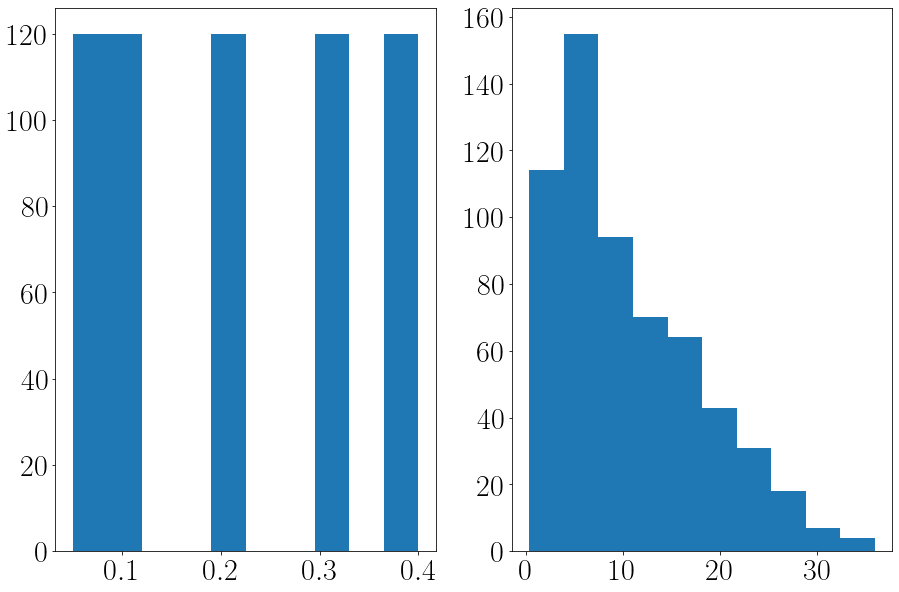

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].hist(maxes)
ax[1].hist(ints)

In [19]:
sol = run_experiment('curve', t_f=400)

In [23]:
cfg.p.max()

0.31098523902213676

In [24]:
A_range = [0.05, 0.1, 0.2, 0.3, 0.4]
# r_rise_range = [0.002, 0.04, 0.07, 0.09, 0.12, 
#          0.15, 0.3, 0.44, 0.8, 1, 1.5, 12]
#r_rise_range = [0.002, 0.04, 0.012, 0.3, 0.8, 1.5, 12]
d_decay_range = [15, 56, 97, 138, 179, 220]
d_rise_range = [1, 11, 21, 31, 41]

# total_trials = len(A_range) * len(r_rise_range) * len(d_decay_range) * len(d_rise_range)
trial_count = 0

maxes = []
ints = []

results_rows = []
for A in tqdm(A_range):
    for d_rise in d_rise_range:
        if d_rise < 8:
            r_rise_range = [0.002, 12]
        elif d_rise < 15:
            r_rise_range = [0.002, 0.44, 1.6]
        elif d_rise < 30:
            r_rise_range = [0.002, 0.12, 0.3, 1]
        elif d_rise < 40:
            r_rise_range = [0.003, 0.07, 0.15, 0.3, 0.8]
        else:
            r_rise_range = [0.002, 0.04, 0.09, 0.15, 0.3, 0.8]
            
        for r_rise in r_rise_range:
            for d_decay in d_decay_range:
                r_decay = compute_r_decay(A, d_decay)
                
                cfg.A = A
                cfg.d_rise = d_rise
                cfg.d_decay = d_decay
                cfg.r_rise = r_rise
                cfg.r_decay = r_decay
                
#                 x, y = get_input_plot('curve')
                
                sol = run_experiment('curve', t_f=400)
                x = cfg.t
                y = cfg.p
                maxes.append(y.max())
                ints.append(scipy.integrate.trapz(y, x))
                
                
        

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [16:18<00:00, 195.75s/it]


(array([ 85., 133., 112.,  81.,  62.,  51.,  35.,  23.,  13.,   5.]),
 array([23.29077815, 25.61951503, 27.94825191, 30.2769888 , 32.60572568,
        34.93446256, 37.26319944, 39.59193633, 41.92067321, 44.24941009,
        46.57814697]),
 <a list of 10 Patch objects>)

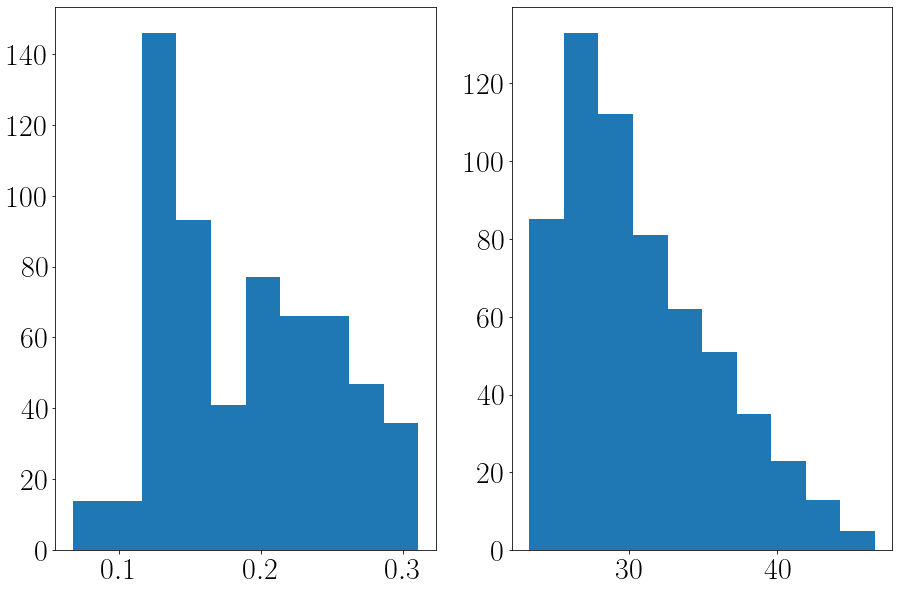

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].hist(maxes)
ax[1].hist(ints)

In [13]:
def continue_Gstar_controlled_experiment(input_type='pulse', t_cont=200, max_step=0.1):
    '''
    Continue experiment for t_f amount of time
    '''
    init = [cfg.c[-1], cfg.c_tot[-1], cfg.h[-1], cfg.p[-1], 0, 0, 0, 0]
    t_0 = cfg.t[-1]
    t_f = cfg.t[-1] + t_cont
    
    sol = scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], init, 
                                    args=['pulse', '', input_type], max_step=max_step)
    sol['glutamate_input_type'] = input_type
    
    cfg.t = np.append(cfg.t, sol.t)
    cfg.c = np.append(cfg.c, sol.y[0])
    cfg.c_tot = np.append(cfg.c_tot, sol.y[1])
    cfg.h = np.append(cfg.h, sol.y[2])
    cfg.p = np.append(cfg.p, sol.y[3])
    cfg.c_er = np.append(cfg.c_er, (cfg.c_tot - cfg.c) * cfg.gamma)
    
    t_input, Gstar = get_input_plot(input_type)
    cfg.t_input = np.append(cfg.t_input, t_input)
    cfg.Gstar = np.append(cfg.Gstar, Gstar)
    return sol

In [14]:
cfg.input_max = 0.1
cfg.input_duration = 1000
sol = run_Gstar_controlled_experiment('pulse', t_f=200)

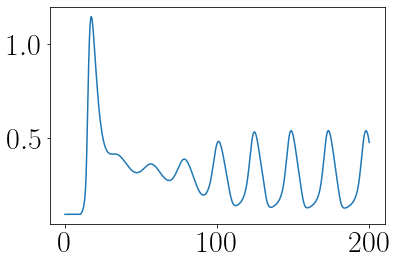

In [15]:
plt.plot(cfg.t, cfg.c)

In [16]:
continue_Gstar_controlled_experiment(input_type='pulse')

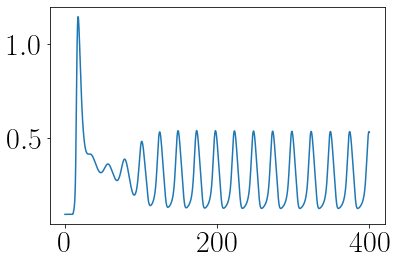

In [17]:
plt.plot(cfg.t, cfg.c)